# Perfil comercial de um país

Perfil comercial de um país. O objetivo é analisar as trocas comerciais de um país com o resto do mundo.

Mais informação em [country_trade_profile_README.md](country_trade_profile_README.md)

## Setup

For instructions and how to obtain an API key, see [here](0-comtrade-setup-first.ipynb).

In [92]:
import logging
import sys

# Configure logging to output to stdout and set level to DEBUG
logging.basicConfig(stream=sys.stdout, level=logging.ERROR)

# Example debug message
logging.debug("This is a debug message")

DEBUG:root:This is a debug message


In [93]:
import comtradetools as comtradetools

comtradetools.setup()
APIKEY = comtradetools.get_api_key()
comtradetools.init(APIKEY, force_init=False)

## Country and period of interest

Choose country and years of interest

In [94]:
import comtradetools


country_of_interest_name = 'Portugal'
country_of_interest = comtradetools.encode_country(country_of_interest_name)

years_of_interest=comtradetools.year_range(2003,2023)
print(country_of_interest_name, years_of_interest)

Portugal 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


## 1.Trade balance

### 1a Trade balance symmetric values

In [95]:
import comtradetools
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

periods = comtradetools.split_period(years_of_interest,6)
global_trade = pd.DataFrame()
for period in periods:
    print(f"Fetching data for period {period}")

    temp = comtradetools.get_trade_flows(country_of_interest,
                                            period=period,
                                            symmetric_values=True)

    global_trade = pd.concat([global_trade,temp])


global_trade = global_trade.replace(0, np.nan)
cols_of_interest = global_trade.columns



Fetching data for period 2003,2004,2005,2006,2007,2008
INFO:root:Calling getFinalData for period 2003
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'typeCode': 'C', 'freqCode': 'A', 'reporterCode': 620, 'partnerCode': 0, 'partner2Code': 0, 'flowCode': 'M', 'period': '2003', 'motCode': 0, 'customsCode': 'C00', 'cmdCode': 'TOTAL', 'clCode': 'HS', 'includeDesc': True}False
DEBUG:root:Calling comtradeapicall.getFinalData with ('b5cdc1c0678544b0ab5085f7292e6643',) {'typeCode': 'C', 'freqCode': 'A', 'reporterCode': 620, 'partnerCode': 0, 'partner2Code': 0, 'flowCode': 'M', 'period': '2003', 'motCode': 0, 'customsCode': 'C00', 'cmdCode': 'TOTAL', 'clCode': 'HS', 'includeDesc': True}
DEBUG:root:Calling comtradeapicall.getFinalData with ('b5cdc1c0678544b0ab5085f7292e6643',) {'typeCode': 'C', 'freqCode': 'A', 'reporterCode': 620, 'partnerCode': 0, 'partner2Code': 0, 'flowCode': 'M', 'period': '2003', 'motCode': 0, 'customsCode': 'C00', 'cmdCode': 'TOTAL', 'clCode': 'HS', 'includeDesc': T

In [133]:
global_trade['varM_perc']=global_trade['M']/global_trade['M<X']
global_trade['varX_perc']=global_trade['X']/global_trade['X<M']
print(f"M = Imports as reported by {country_of_interest_name}")
print(f"X = Exports as reported by {country_of_interest_name}")
print(f"X<M = Exports as reported by rest of the world imports from {country_of_interest_name}")
print(f"M<X = Imports as reported by rest of the world exports to {country_of_interest_name}")
global_trade


M = Imports as reported by Portugal
X = Exports as reported by Portugal
X<M = Exports as reported by rest of the world imports from Portugal
M<X = Imports as reported by rest of the world exports to Portugal


sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x27bdf2da0>


flowCode,M,M<X,X,X<M,trade_balance (X-M),trade_balance (X<M-M),trade_volume (X+M),trade_volume (X<M+M),varM_perc,varX_perc
period,,,,,,,,,,
2003,"47,166,165,432.00","48,176,835,559.63","31,833,580,815.00","32,191,541,568.46","-15,332,584,617.00","-14,974,623,863.54","78,999,746,247.00","79,357,707,000.46",0.98,0.99
2004,"68,222,019,741.00","56,718,593,826.78","44,354,988,764.00","36,429,438,074.32","-23,867,030,977.00","-31,792,581,666.68","112,577,008,505.00","104,651,457,815.32",1.20,1.22
2005,"63,903,733,547.00","61,162,543,241.43","38,672,068,551.00","37,246,800,619.07","-25,231,664,996.00","-26,656,932,927.93","102,575,802,098.00","101,150,534,166.07",1.04,1.04
2006,"70,707,161,372.00","67,532,697,771.91","44,777,435,756.00","42,923,509,239.71","-25,929,725,616.00","-27,783,652,132.29","115,484,597,128.00","113,630,670,611.71",1.05,1.04
2007,"82,267,209,952.00","76,819,899,714.76","52,483,606,244.00","47,201,726,727.22","-29,783,603,708.00","-35,065,483,224.78","134,750,816,196.00","129,468,936,679.22",1.07,1.11
2008,"94,553,785,723.00","85,832,096,561.69","57,246,284,833.00","49,012,159,101.95","-37,307,500,890.00","-45,541,626,621.05","151,800,070,556.00","143,565,944,824.95",1.10,1.17
2009,"71,810,896,681.00","67,632,145,175.36","44,249,979,857.00","41,373,305,884.65","-27,560,916,824.00","-30,437,590,796.35","116,060,876,538.00","113,184,202,565.65",1.06,1.07
2010,"77,682,426,213.00","73,882,065,647.70","49,414,051,268.00","46,501,745,704.82","-28,268,374,945.00","-31,180,680,508.18","127,096,477,481.00","124,184,171,917.82",1.05,1.06
2011,"82,923,617,602.00","79,109,995,942.24","59,588,301,885.00","56,562,618,384.15","-23,335,315,717.00","-26,360,999,217.85","142,511,919,487.00","139,486,235,986.15",1.05,1.05


Save to Excel file

In [134]:
start_year=global_trade.index.min()
end_year=global_trade.index.max()
excel_file = f"reports/{country_of_interest_name}_1.1_trade_balance_{start_year}-{end_year}.xlsx"
global_trade.to_excel(excel_file)
print("Trade ballance report saved to ", excel_file)

Trade ballance report saved to  reports/Portugal_1.1_trade_balance_2003-2023.xlsx


### Trade balance graph

Plot saved to  reports/Portugal_1.2_trade_balance_2003-2023.png
0 Line2D(M) 0.0
1 Line2D(M<X) 0.8
2 Line2D(X) 0.0
3 Line2D(X<M) 0.8
4 Line2D(trade_balance (X-M)) 0.0
5 Line2D(trade_balance (X<M-M)) 0.8
6 Line2D(trade_volume (X+M)) 0.0
7 Line2D(trade_volume (X<M+M)) 0.8


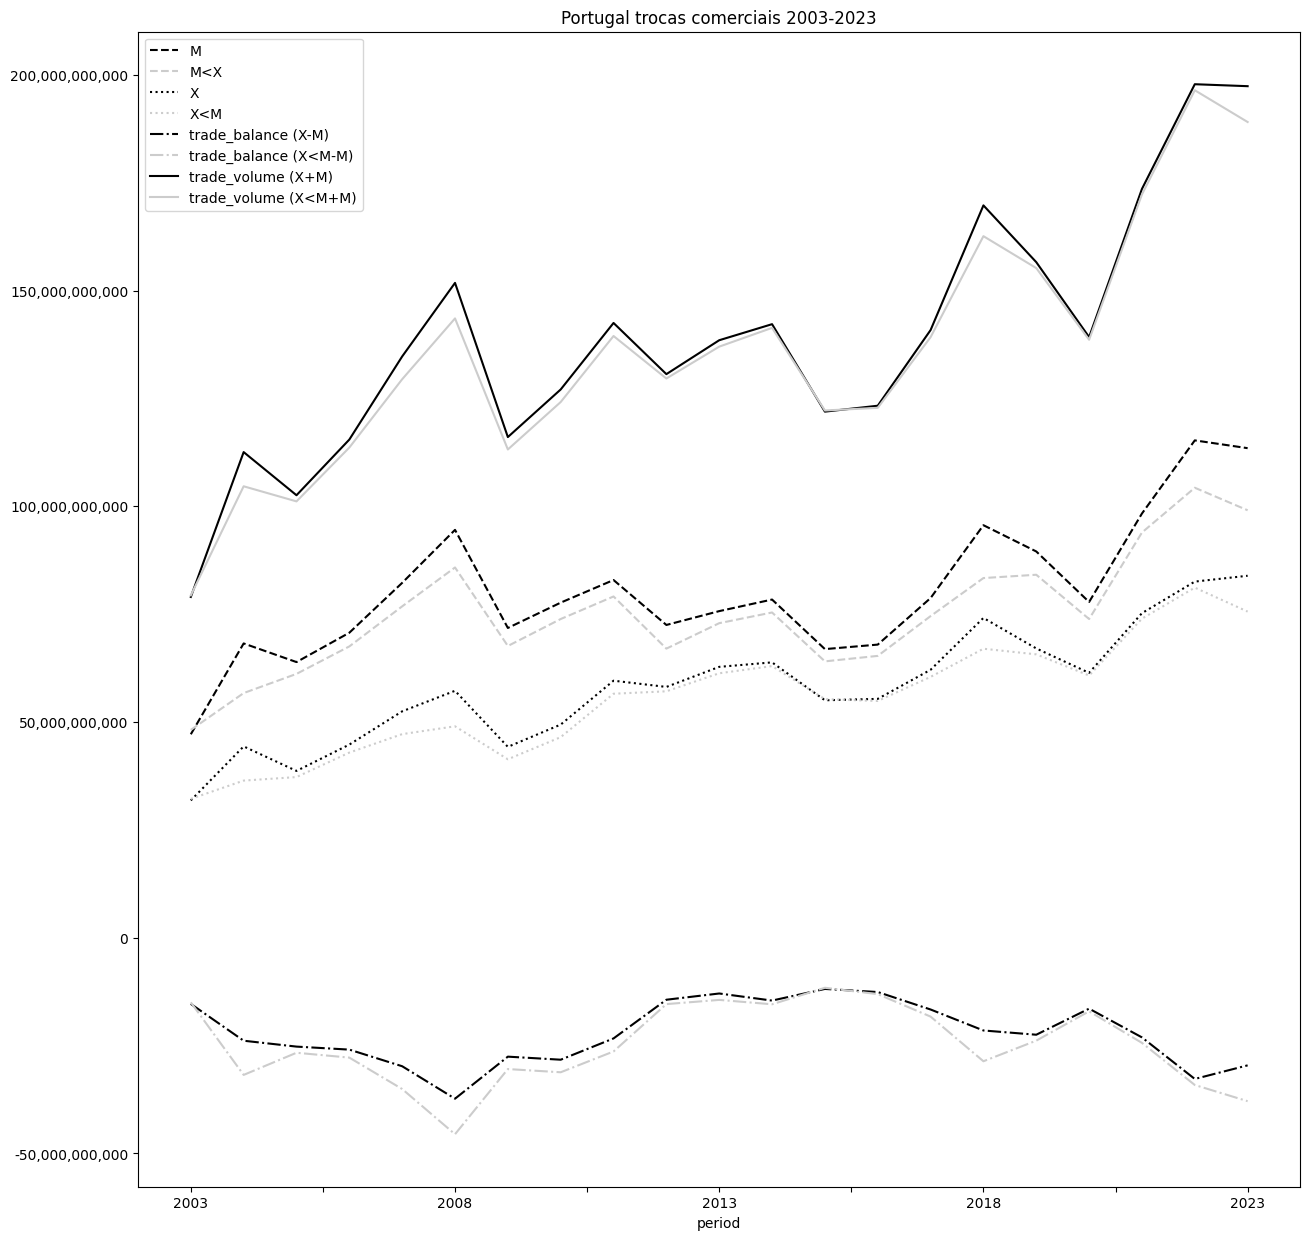

In [135]:
import logging

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
logging.basicConfig(level=logging.ERROR)

plotfile = f"reports/{country_of_interest_name}_1.2_trade_balance_{start_year}-{end_year}.png"

start_year=global_trade.index.min()
end_year=global_trade.index.max()
title=f"{country_of_interest_name} trocas comerciais {start_year}-{end_year}"
print("Plot saved to ", plotfile)
fig = global_trade[cols_of_interest].plot.line(figsize=(15,15),title=title)

# use a grayscale palette of colors
colors = ['0.0','0.8','0.0','0.8','0.0','0.8','0.0','0.8']

# use different line styles and black lines
linestyles = ['dashed', 'dashed', 'dotted', 'dotted', 'dashdot', 'dashdot', 'solid', 'solid']
for i, line in enumerate(fig.get_lines()):
    print(i, line, colors[i])
    line.set_color(colors[i])
    line.set_linestyle(linestyles[i % len(linestyles)])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig.yaxis.set_major_formatter(formatter)
fig.legend(list(global_trade.columns.astype(str)))

plt.savefig(plotfile)
plt.show()

## 2. Exports


### 2.1 Main export partners/clients

Colect destinations of exports of the country. 

Use either reported exports
of country of interest, or reported imports from country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [99]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'


In [100]:

# years_of_interest = comtrade.year_range(2020, 2021)
df = comtradetools.getFinalData(APIKEY,
                                reporterCode=reporterCode,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode=flowCode,
                                period=years_of_interest,
                                period_size=1,
                                partnerCode=partnerCode,
                                remove_world=True,
                                partner2Code=0,  # world
                                clCode="HS",
                                cmdCode="TOTAL",
                                motCode=0,  # all means of transport
                                customsCode='C00', # all customs
                                includeDesc=True,
                                cache=True
                                )

INFO:root:Calling getFinalData for period 2003
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'reporterCode': None, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2003', 'partnerCode': 620, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode': 'TOTAL', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}False
DEBUG:root:Calling comtradeapicall.getFinalData with ('b5cdc1c0678544b0ab5085f7292e6643',) {'reporterCode': None, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2003', 'partnerCode': 620, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode': 'TOTAL', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}
DEBUG:root:Calling comtradeapicall.getFinalData with ('b5cdc1c0678544b0ab5085f7292e6643',) {'reporterCode': None, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2003', 'partnerCode': 620, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode': 'TOTAL', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}
DEBUG:urllib3.connectionpool:Starting new

Compute percentage o trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [136]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5

# aggregate by year, flow, reporter
exports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode',f'{reporter_column}Desc','partner_rank',f'{partner_column}Desc','cmdCode','partner_sum','partner_perc','partner_upper_sum']

formats =  comtradetools.make_format(cols)

top_export_partners = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_export_partners_codes = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} export partners of {country_of_interest_name} in {years_of_interest}: \n{top_export_partners}")
exports[exports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).style.format(formats)

Top 5 export partners of Portugal in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['France' 'Germany' 'Spain' 'United Kingdom' 'USA']


,refYear,flowCode,partnerDesc,partner_rank,reporterDesc,cmdCode,partner_sum,partner_perc,partner_upper_sum
6020,2003,M,Algeria,1,USA,220421,"$243,850,370,384",0.000%,"$589,254,965,350"
1507,2003,M,Bahamas,2,Germany,847330,"$143,992,779,000",0.000%,"$589,254,965,350"
4491,2003,M,Albania,3,United Kingdom,999999,"$103,630,968,652",0.000%,"$589,254,965,350"
0,2003,M,Kenya,4,France,640399,"$54,228,692,792",0.000%,"$589,254,965,350"
3148,2003,M,Switzerland,5,Spain,220421,"$43,552,154,522",0.000%,"$589,254,965,350"
12122,2004,M,Albania,1,USA,220421,"$273,476,742,294",0.000%,"$692,222,457,306"
9046,2004,M,Afghanistan,2,Germany,220421,"$180,500,293,000",0.000%,"$692,222,457,306"
12056,2004,M,Algeria,3,United Kingdom,220421,"$119,205,876,342",0.000%,"$692,222,457,306"
7542,2004,M,Algeria,4,France,220421,"$65,375,995,126",0.000%,"$692,222,457,306"
10670,2004,M,Algeria,5,Spain,220421,"$53,663,550,544",0.000%,"$692,222,457,306"


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [102]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)
pivoted.fillna(0)

partner_perc                                          \
reporterDesc      Afghanistan Albania Algeria Andorra Angola Anguilla   
refYear flowDesc                                                        
2003    Import           0.00    0.00    0.00    0.00   0.00     0.00   
2004    Import           0.00    0.00    0.00    0.00   0.00     0.00   
2005    Import           0.00    0.00    0.00    0.00   0.00     0.00   
2006    Import           0.00    0.00    0.00    0.00   0.00     0.00   
2007    Import           0.00    0.00    0.00    0.00   0.03     0.00   
2008    Import           0.00    0.00    0.00    0.00   0.00     0.00   
2009    Import           0.00    0.00    0.01    0.00   0.09     0.00   
2010    Import           0.00    0.00    0.01    0.00   0.06     0.00   
2011    Import           0.00    0.00    0.01    0.00   0.06     0.00   
2012    Import           0.00    0.00    0.01    0.00   0.09     0.00   
2013    Import           0.00    0.00    0.01    0.00   0.07     0.00   
2014    Import           0.00    0.00    0.01    0.00   0.08     0.00   
2015    Import           0.00    0.00    0.01    0.00   0.05     0.00   
2016    Import           0.00    0.00    0.01    0.00   0.03     0.00   
2017    Import           0.00    0.00    0.01    0.00   0.04     0.00   
2018    Import           0.00    0.00    0.00    0.00   0.03     0.00   
2019    Import           0.00    0.00    0.00    0.00   0.03     0.00   
2020    Import           0.00    0.00    0.00    0.00   0.02     0.00   
2021    Import           0.00    0.00    0.00    0.00   0.02     0.00   
2022    Import           0.00    0.00    0.00    0.00   0.02     0.00   
2023    Import           0.00    0.00    0.00    0.00   0.00     0.00   

                                                              ...  \
reporterDesc     Antigua and Barbuda Argentina Armenia Aruba  ...   
refYear flowDesc                                              ...   
2003    Import                  0.00      0.00    0.00  0.00  ...   
2004    Import                  0.00      0.00    0.00  0.00  ...   
2005    Import                  0.00      0.00    0.00  0.00  ...   
2006    Import                  0.00      0.00    0.00  0.00  ...   
2007    Import                  0.00      0.00    0.00  0.00  ...   
2008    Import                  0.00      0.00    0.00  0.00  ...   
2009    Import                  0.00      0.00    0.00  0.00  ...   
2010    Import                  0.00      0.00    0.00  0.00  ...   
2011    Import                  0.00      0.00    0.00  0.00  ...   
2012    Import                  0.00      0.00    0.00  0.00  ...   
2013    Import                  0.00      0.00    0.00  0.00  ...   
2014    Import                  0.00      0.00    0.00  0.00  ...   
2015    Import                  0.00      0.00    0.00  0.00  ...   
2016    Import                  0.00      0.00    0.00  0.00  ...   
2017    Import                  0.00      0.00    0.00  0.00  ...   
2018    Import                  0.00      0.00    0.00  0.00  ...   
2019    Import                  0.00      0.00    0.00  0.00  ...   
2020    Import                  0.00      0.00    0.00  0.00  ...   
2021    Import                  0.00      0.00    0.00  0.00  ...   
2022    Import                  0.00      0.00    0.00  0.00  ...   
2023    Import                  0.00      0.00    0.00  0.00  ...   

                            primaryValue                                       \
reporterDesc     United Rep. of Tanzania       Uruguay   Uzbekistan   Vanuatu   
refYear flowDesc                                                                
2003    Import                242,284.00  2,211,051.00         0.00      0.00   
2004    Import                517,934.00  2,312,229.00         0.00      0.00   
2005    Import              1,610,217.00  2,765,218.00         0.00      0.00   
2006    Import                641,271.00  2,872,798.00         0.00  1,440.00   
2007    Import                383,133.00

Limit table to top_export_partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [103]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]
pivoted[show_only_columns]

partner_perc                                           \
reporterDesc           Angola France Germany Spain  USA United Kingdom   
refYear flowDesc                                                         
2003    Import            NaN   0.12    0.18  0.21 0.06           0.10   
2004    Import            NaN   0.12    0.16  0.23 0.06           0.10   
2005    Import            NaN   0.12    0.13  0.25 0.06           0.09   
2006    Import            NaN   0.12    0.12  0.25 0.07           0.13   
2007    Import           0.03   0.12    0.12  0.27 0.07           0.06   
2008    Import            NaN   0.12    0.12  0.28 0.05           0.07   
2009    Import           0.09   0.12    0.12  0.25 0.04           0.05   
2010    Import           0.06   0.12    0.11  0.24 0.05           0.06   
2011    Import           0.06   0.12    0.12  0.23 0.05           0.05   
2012    Import           0.09   0.11    0.11  0.20 0.05           0.05   
2013    Import           0.07   0.11    0.11  0.22 0.05           0.05   
2014    Import           0.08   0.11    0.11  0.21 0.05           0.06   
2015    Import           0.05   0.11    0.11  0.22 0.06           0.06   
2016    Import           0.03   0.11    0.11  0.22 0.06           0.07   
2017    Import           0.04   0.11    0.11  0.21 0.06           0.06   
2018    Import           0.03   0.12    0.12  0.21 0.06           0.06   
2019    Import           0.03   0.12    0.13  0.19 0.06           0.06   
2020    Import           0.02   0.12    0.12  0.20 0.07           0.05   
2021    Import           0.02   0.11    0.11  0.22 0.07           0.05   
2022    Import           0.02   0.11    0.11  0.21 0.08           0.06   
2023    Import            NaN   0.12    0.11  0.23 0.09           0.06   

                     primaryValue                                    \
reporterDesc               Angola           France          Germany   
refYear flowDesc                                                      
2003    Import                NaN 3,910,247,385.00 5,834,812,000.00   
2004    Import                NaN 4,523,585,446.00 5,760,427,000.00   
2005    Import                NaN 4,561,731,166.00 5,017,596,000.00   
2006    Import                NaN 4,957,008,101.00 5,150,708,000.00   
2007    Import   1,641,640,086.00 5,647,642,029.00 5,668,187,000.00   
2008    Import                NaN 6,030,558,826.00 5,981,081,505.81   
2009    Import   3,704,037,715.00 5,012,944,645.00 4,825,031,977.97   
2010    Import   2,607,038,140.00 5,579,443,506.00 5,327,870,321.73   
2011    Import   3,455,494,969.00 6,715,701,649.00 6,548,531,186.09   
2012    Import   5,378,237,289.00 6,239,901,877.00 6,265,842,652.72   
2013    Import   4,339,196,450.00 6,750,280,594.00 6,781,727,952.78   
2014    Import   4,781,920,802.00 6,721,992,210.00 6,915,294,839.89   
2015    Import   2,783,117,807.23 6,030,946,824.00 6,127,547,046.37   
2016    Import   1,902,467,438.06 6,186,232,068.00 6,308,492,559.09   
2017    Import   2,561,556,789.19 6,753,047,426.35 6,653,896,252.22   
2018    Import   2,187,650,970.82 7,912,632,527.42 8,054,416,119.81   
2019    Import   1,827,182,900.95 7,817,264,081.74 8,281,795,765.31   
2020    Import   1,294,540,277.34 7,110,878,253.52 7,365,348,902.10   
2021    Import   1,357,979,633.71 8,265,956,732.37 8,372,943,606.98   
2022    Import   1,913,296,319.32 8,569,312,614.71 8,830,816,441.10   
2023    Import                NaN 9,169,506,093.13 8,589,665,812.30   

                                                                      
reporterDesc                 Spain              USA   United Kingdom  
refYear flowDesc                                                      
2003    Import    6,848,182,464.61 2,044,758,486.00 3,219,396,003.00  
2004    Import    8,356,275,153.68 2,332,877,626.00 3,545,357,812.00  
2005    Import    9,339,521,872.27 2,415,187,911.00 3,364,798,027.00  
2006    Import   10,718,527,538.78 3,144,623,882.00 5,390,108,189.00  
2007    Import   12,722,770,111.19 3,1

Make a table with the total value of exports for top partners in the period of interest

In [104]:
print("Top partners for exports: ",top_export_partners)
print("Period of interest:",years_of_interest)

Top partners for exports:  ['France' 'Germany' 'Spain' 'United Kingdom' 'USA' 'Angola']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [105]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_export_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

reporterDesc,Spain,Germany,France,United Kingdom,USA,Angola
refYear,,,,,,
2003,"6,848,182,464.61","5,834,812,000.00","3,910,247,385.00","3,219,396,003.00","2,044,758,486.00",NaN
2004,"8,356,275,153.68","5,760,427,000.00","4,523,585,446.00","3,545,357,812.00","2,332,877,626.00",NaN
2005,"9,339,521,872.27","5,017,596,000.00","4,561,731,166.00","3,364,798,027.00","2,415,187,911.00",NaN
2006,"10,718,527,538.78","5,150,708,000.00","4,957,008,101.00","5,390,108,189.00","3,144,623,882.00",NaN
2007,"12,722,770,111.19","5,668,187,000.00","5,647,642,029.00","3,036,507,059.00","3,174,914,215.00","1,641,640,086.00"
2008,"13,746,126,393.38","5,981,081,505.81","6,030,558,826.00","3,192,779,337.00","2,536,178,939.00",NaN
2009,"10,207,644,485.81","4,825,031,977.97","5,012,944,645.00","2,224,149,786.00","1,629,320,674.00","3,704,037,715.00"
2010,"11,210,074,656.64","5,327,870,321.73","5,579,443,506.00","2,685,315,606.00","2,225,064,682.00","2,607,038,140.00"
2011,"12,865,906,982.60","6,548,531,186.09","6,715,701,649.00","2,890,234,582.00","2,671,205,511.00","3,455,494,969.00"


Plot saved to  reports/Portugal_2.1.4_export_partners_2003-2023.png
0 Line2D(_child0) #555555
1 Line2D(_child2) #666666
2 Line2D(_child4) #777777
3 Line2D(_child6) #888888
4 Line2D(_child8) #999999
5 Line2D(_child10) #AAAAAA


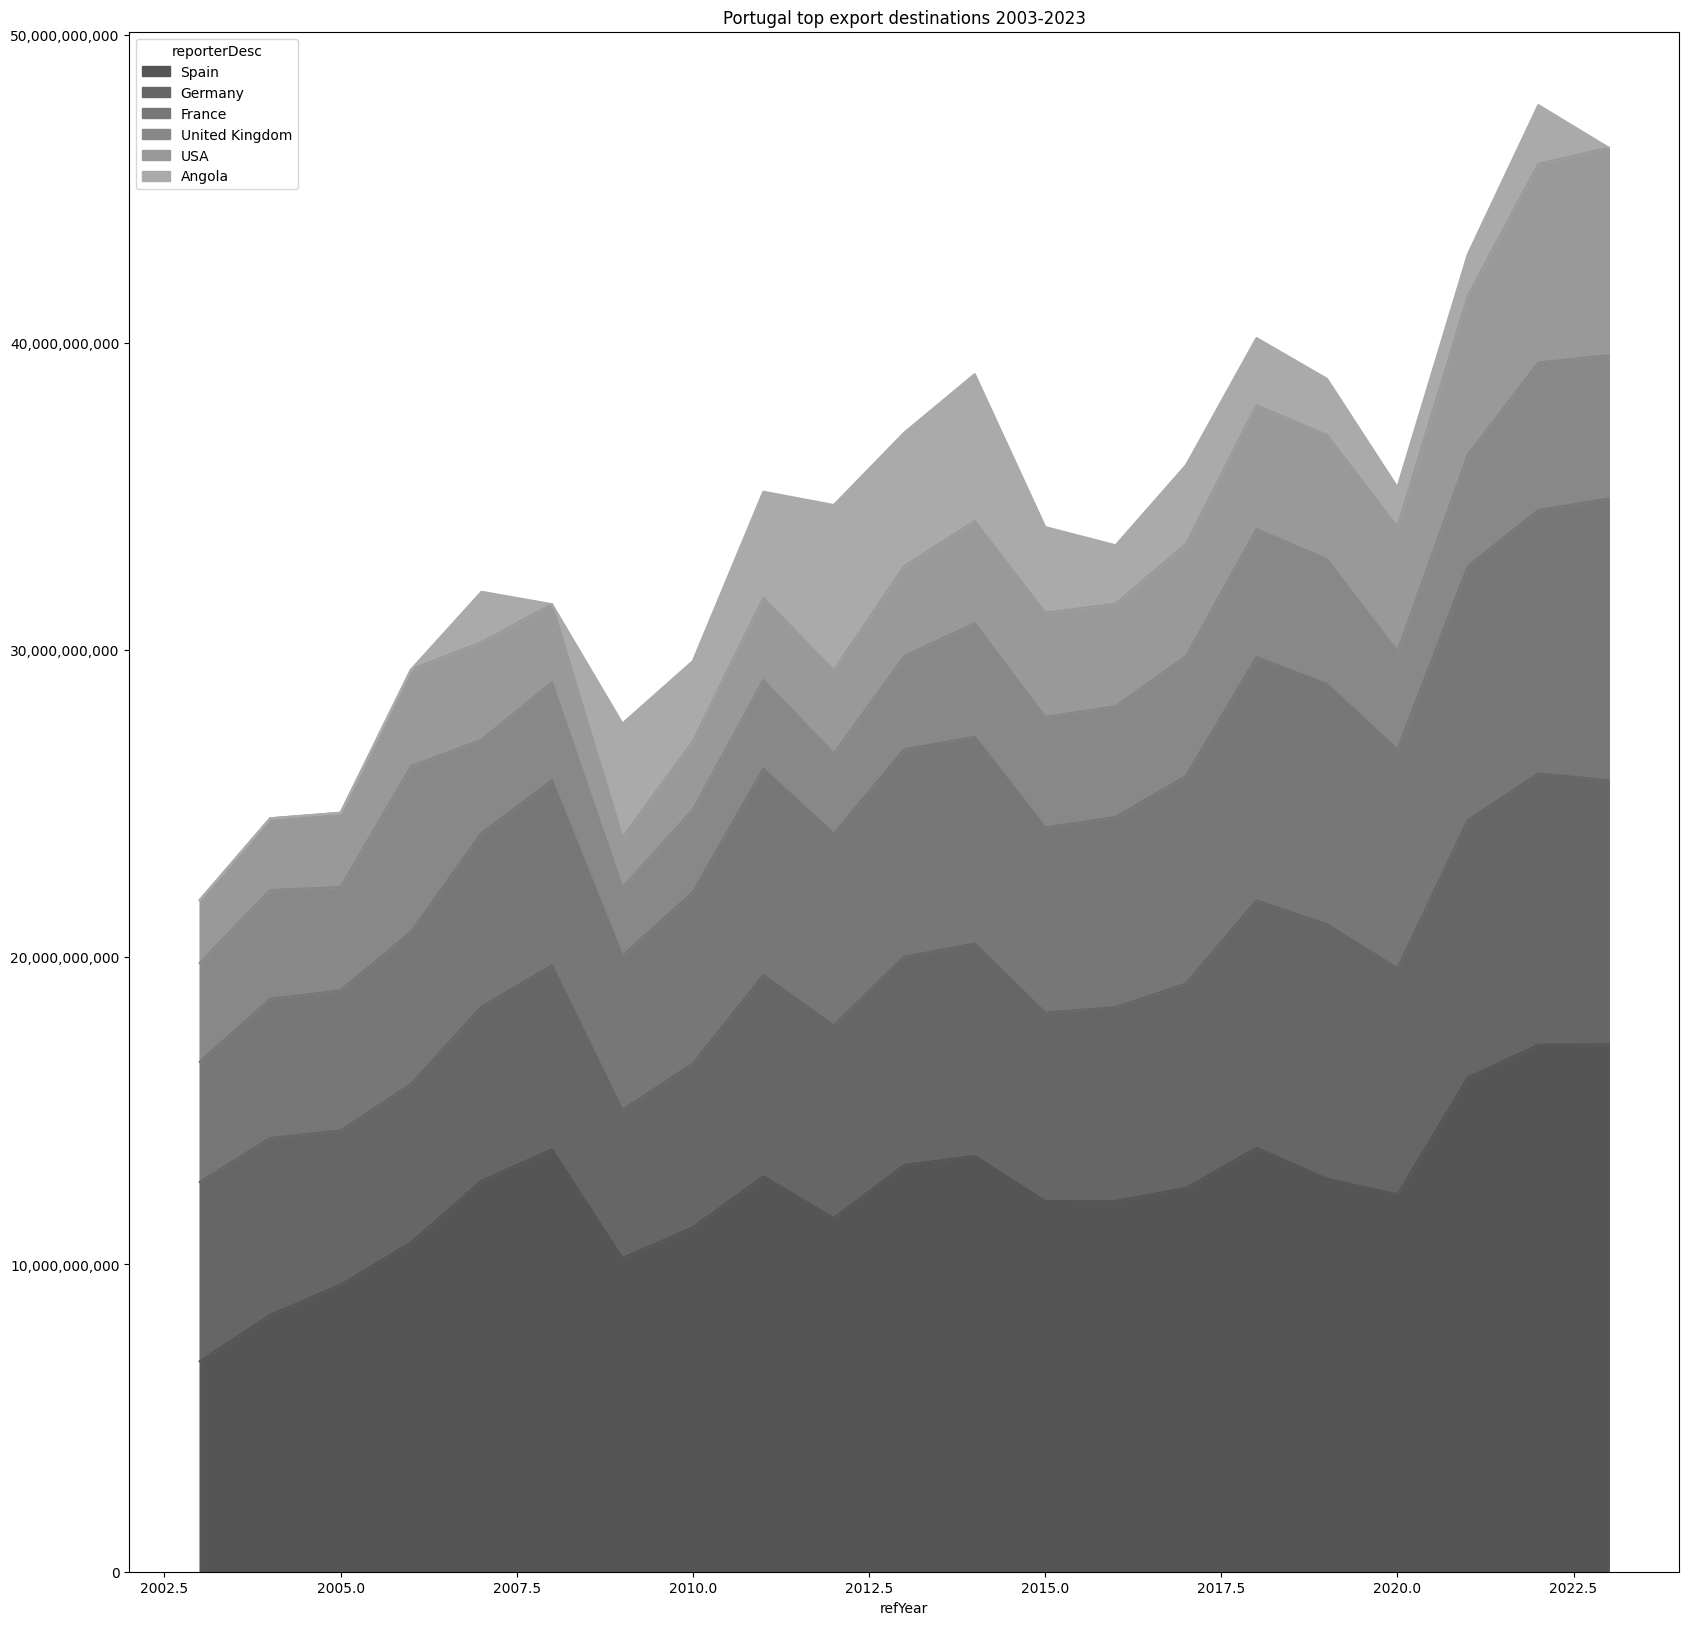

In [106]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plotfile = f"reports/{country_of_interest_name}_2.1.4_export_partners_{start_year}-{end_year}.png"
start_year=values_only.index.min()
end_year=values_only.index.max()
title=f"{country_of_interest_name} top export destinations {start_year}-{end_year}"
print("Plot saved to ", plotfile)
# see https://matplotlib.org/stable/gallery/color/named_colors.html
# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', ]

fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)
for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

In [107]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]

#### Export to Excel

Table with the top export destinations for the period of interest

In [108]:
top_partners_file = f'reports/{country_of_interest_name}_2.1.1_top_export_partners.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_2.1.2_top_export_partners_cols.xlsx'
export_top_partners_file = f'reports/{country_of_interest_name}_2.1.3_export_top_{show_only_top}_partners_{start_year}-{end_year}.xlsx'

exports[cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].to_excel(export_top_partners_file)

print(f"Top partners file: {top_partners_file}")
print(f"Top partners cols file: {top_partners_cols_file}")
print(f"Export top partners file: {export_top_partners_file}")

Top partners file: reports/Portugal_2.1.1_top_export_partners.xlsx
Top partners cols file: reports/Portugal_2.1.2_top_export_partners_cols.xlsx
Export top partners file: reports/Portugal_2.1.3_export_top_5_partners_2003-2023.xlsx


### 2.2 Exports: products

#### What are the main exported products

In [109]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5
# years_of_interest = comtrade.year_range(2020, 2021)

print(country_of_interest_name, years_of_interest)

Portugal 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products exported by country of interest

In [110]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = True  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'



In [112]:
import comtradetools

clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World Bank uses AG6
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True
                        )

INFO:root:Calling getFinalData for period 2003
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'reporterCode': None, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2003', 'partnerCode': 620, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode': 'AG6', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}False
DEBUG:root:Calling comtradeapicall.getFinalData with ('b5cdc1c0678544b0ab5085f7292e6643',) {'reporterCode': None, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2003', 'partnerCode': 620, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode': 'AG6', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}
DEBUG:root:Calling comtradeapicall.getFinalData with ('b5cdc1c0678544b0ab5085f7292e6643',) {'reporterCode': None, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2003', 'partnerCode': 620, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode': 'AG6', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}
DEBUG:urllib3.connectionpool:Starting new HTTPS

In [113]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [114]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20030101,2003,52,2003,76,BRA,Brazil,M,...,"1,800.00",False,0.00,False,"24,000.00","20,000.00","24,000.00",0,False,True
1,C,A,20030101,2003,52,2003,32,ARG,Argentina,M,...,73.00,False,NaN,False,"8,515.00",NaN,"8,515.00",0,True,False
2,C,A,20030101,2003,52,2003,56,BEL,Belgium,M,...,17.00,True,NaN,False,"2,812.00",NaN,"2,812.00",4,True,False
3,C,A,20030101,2003,52,2003,32,ARG,Argentina,M,...,55.00,False,NaN,False,"2,885.00",NaN,"2,885.00",0,True,False
4,C,A,20030101,2003,52,2003,56,BEL,Belgium,M,...,81.00,False,NaN,False,"12,425.00",NaN,"12,425.00",0,True,False


Agreggate by product, keep the top products exported each year

In [115]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
exports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
exports = exports[exports['product_rank']<=show_only_top]
exports.info()

cols=['refYear','flowCode','product_rank','cmdCode', 'cmdDesc','product_sum','product_upper_perc', 'product_upper_sum']
formats =  comtradetools.make_format(cols)

top_export_products_codes = exports['cmdCode'].unique()

print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
exports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 3566 to 1741964
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  105 non-null    object 
 1   freqCode                  105 non-null    object 
 2   refPeriodId               105 non-null    int64  
 3   refYear                   105 non-null    int64  
 4   refMonth                  105 non-null    int64  
 5   period                    105 non-null    object 
 6   reporterCode              105 non-null    int64  
 7   reporterISO               105 non-null    object 
 8   reporterDesc              105 non-null    object 
 9   flowCode                  105 non-null    object 
 10  flowDesc                  105 non-null    object 
 11  partnerCode               105 non-null    int64  
 12  partnerISO                105 non-null    object 
 13  partnerDesc               105 non-null    object 
 14  par

,refYear,flowCode,product_rank,cmdCode,cmdDesc,product_sum,product_upper_perc,product_upper_sum
6106,2003,M,1,870332,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), cylinder capacity exceeding 1500cc but not exceeding 2500cc","$2,211,853,851",6.933%,"$31,901,092,345"
6794,2003,M,2,999999,Commodities not specified according to kind,"$1,026,808,636",3.219%,"$31,901,092,345"
5988,2003,M,3,854221,"Electronic integrated circuits and microassemblies; monolithic integrated circuits, digital","$975,687,119",3.058%,"$31,901,092,345"
3566,2003,M,4,640399,"Footwear; n.e.s. in heading no. 6403, (not covering the ankle), outer soles of rubber, plastics or composition leather, uppers of leather","$938,677,765",2.942%,"$31,901,092,345"
5203,2003,M,5,847330,"Machines; parts and accessories of automatic data processing, magnetic or optical readers, digital processing units","$889,443,880",2.788%,"$31,901,092,345"
68749,2004,M,1,870332,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), cylinder capacity exceeding 1500cc but not exceeding 2500cc","$2,060,323,650",5.700%,"$36,143,880,581"
67781,2004,M,2,847330,"Machines; parts and accessories of automatic data processing, magnetic or optical readers, digital processing units","$1,133,732,755",3.137%,"$36,143,880,581"
69441,2004,M,3,999999,Commodities not specified according to kind,"$1,083,859,298",2.999%,"$36,143,880,581"
68337,2004,M,4,852721,"Radio-broadcast receivers; (not operational without external power source), combined with sound recording or reproducing apparatus, including apparatus capable of receiving radio-telephony or radio-telegraphy","$887,094,940",2.454%,"$36,143,880,581"
66025,2004,M,5,640399,"Footwear; n.e.s. in heading no. 6403, (not covering the ankle), outer soles of rubber, plastics or composition leather, uppers of leather","$858,585,061",2.375%,"$36,143,880,581"


#### Export to Excel

In [116]:
filename = f'reports/{country_of_interest_name}_2.2_exports_products_{clCode}-{cmdDetail}-{exports["refYear"].min()}-{exports["refYear"].max()}.xlsx'
print("Exporting to ",filename)
exports[cols].sort_values(['refYear','flowCode','product_rank']).to_excel(filename,index=False)

Exporting to  reports/Portugal_2.2_exports_products_HS-AG6-2003-2023.xlsx


### 2.3 Export partners / products analysis

Which are the partners buying the top exports of country of interest?


In [138]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = True  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'



In [139]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=True,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'reporterCode': None, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2003', 'partnerCode': 620, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode': 'AG6', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}False
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'reporterCode': None, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2004', 'partnerCode': 620, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode': 'AG6', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}False
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'reporterCode': None, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2005', 'partnerCode': 620, 'partner2Code': 0, 'clCode': 'HS', 'cmdC

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820728 entries, 0 to 1820727
Data columns (total 47 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   typeCode                  object 
 1   freqCode                  object 
 2   refPeriodId               int64  
 3   refYear                   int64  
 4   refMonth                  int64  
 5   period                    object 
 6   reporterCode              int64  
 7   reporterISO               object 
 8   reporterDesc              object 
 9   flowCode                  object 
 10  flowDesc                  object 
 11  partnerCode               int64  
 12  partnerISO                object 
 13  partnerDesc               object 
 14  partner2Code              int64  
 15  partner2ISO               object 
 16  partner2Desc              object 
 17  classificationCode        object 
 18  classificationSearchCode  object 
 19  isOriginalClassification  bool   
 20  cmdCode                 

In [141]:
cols=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
907784,2014,M,Mozambique,Portugal,"448,210.00",940161,"Seats; with wooden frames, upholstered, (excluding medical, surgical, dental, veterinary or barber furniture)"
1230279,2017,M,Spain,Portugal,"28,493.66",843239,"Seeders, planters and transplanters; other than no-till direct seeders, planters and transplanters"
38445,2003,M,Norway,Portugal,"1,441.01",610190,"Coats; men's or boys' overcoats, car-coats, capes, anoraks, wind-jackets and similar articles, of textile materials n.e.s. in heading no. 6101, knitted or crocheted (excluding those of heading no...."
1390520,2019,M,Kuwait,Portugal,267.00,848310,Transmission shafts (including cam shafts and crank shafts) and cranks
546280,2010,M,Zimbabwe,Portugal,"216,123.56",847710,"Machinery; injection-moulding machines, for working rubber or plastics or for the manufacture of products from these materials"
1679594,2022,M,Kuwait,Portugal,"597,332.44",382450,Mortars and concretes; non-refractory
1361540,2019,M,Denmark,Portugal,"1,290.51",902820,"Meters; liquid supply or production meters, including calibrating meters thereof"
374104,2008,M,Morocco,Portugal,2.32,481013,"Paper and paperboard; coated with kaolin or other inorganic substances, for printing & writing, graphics, containing no, or not more than 10% by weight of total fibres obtained by mechanical or ch..."
1600939,2021,M,Senegal,Portugal,21.57,391910,"Plastics; plates, sheets, film, foil, tape, strip, other flat shapes thereof, self-adhesive, in rolls of a width not exceeding 20cm"
231798,2006,M,Netherlands,Portugal,"40,202.00",620212,"Coats; women's or girls', overcoats, raincoats, car-coats, capes, cloaks and similar articles, of cotton, other than those of heading no. 6204 (not knitted or crocheted)"


In [121]:
df.refYear.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

Aggregate by partner and keep the main ones

In [142]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)

cols=['refYear',f'{reporter_column}Desc','flowCode','cmdCode','cmdDesc',f'{partner_column}Desc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)
products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_export_products_codes)
                       & (products_and_partners[f'{prefix}_rank']<=show_only_top))]


Top products exported by Portugal in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['640399' '847330' '854221' '870332' '999999' '852721' '852520' '870899'
 '870323' '220421' '610910' '271011' '470329' '480256' '271012' '271019'
 '401110' '240220' '870322' '870829' '853710' '300490' '300390' '271600']
   640399: Footwear; n.e.c. in heading no. 6403, (not covering the ankle), outer soles of rubber, plastics or composition leather, uppers of leather
   847330: Machinery; parts and accessories (other than covers, carrying cases and the like) of the machines of heading no. 8471
   854221: 854221
   870332: Vehicles; with only compression-ignition internal combustion piston engine (diesel or semi-diesel), cylinder capacity over 1500 but not over 2500cc
   999999: Commodities not specified according to kind
   852721: Radio-broadcast receivers not capable of operating without an external source of power, of a kind used in motor veh

#### Show partners for main export products

In [143]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True])\
                                             .head(10).style.format(formats) #.hide(axis='index')

,refYear,partnerDesc,flowCode,cmdCode,cmdDesc,reporterDesc,cmd_partner_rank,cmd_partner_sum,cmd_partner_perc,cmd_partner_upper_sum
6110,2003,Portugal,M,870332,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), cylinder capacity exceeding 1500cc but not exceeding 2500cc",Belgium,1,"$638,499,919",28.867%,"$2,211,853,851"
23434,2003,Portugal,M,870332,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), cylinder capacity exceeding 1500cc but not exceeding 2500cc",Germany,2,"$541,982,000",24.504%,"$2,211,853,851"
61618,2003,Portugal,M,870332,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), cylinder capacity exceeding 1500cc but not exceeding 2500cc",United Kingdom,3,"$400,495,902",18.107%,"$2,211,853,851"
6109,2003,Portugal,M,870332,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), cylinder capacity exceeding 1500cc but not exceeding 2500cc",Austria,4,"$202,094,789",9.137%,"$2,211,853,851"
32830,2003,Portugal,M,870332,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), cylinder capacity exceeding 1500cc but not exceeding 2500cc",Italy,5,"$168,335,634",7.611%,"$2,211,853,851"
23763,2003,Portugal,M,999999,Commodities not specified according to kind,Germany,1,"$800,484,000",77.958%,"$1,026,808,636"
33817,2003,Portugal,M,999999,Commodities not specified according to kind,Italy,2,"$78,566,500",7.652%,"$1,026,808,636"
62166,2003,Portugal,M,999999,Commodities not specified according to kind,USA,3,"$54,917,997",5.348%,"$1,026,808,636"
57047,2003,Portugal,M,999999,Commodities not specified according to kind,Sweden,4,"$22,822,720",2.223%,"$1,026,808,636"
33822,2003,Portugal,M,999999,Commodities not specified according to kind,Kuwait,5,"$11,219,603",1.093%,"$1,026,808,636"


#### Export to Excel

In [144]:
filename = f'reports/{country_of_interest_name}_2.3_exports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True]).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Portugal_2.3_exports_products_partners_HS-AG6-2003-2023.xlsx


### 2.4 Main clients and products exported 

Detail of the main products by export partner.

Allows to analyse the mix of products of the main export partners from this country

In [145]:
top_export_partners

array(['France', 'Germany', 'Spain', 'United Kingdom', 'USA'],
      dtype=object)

In [147]:
import comtradetools

show_only_top = 5

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='partner_cmd'
partners_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear',f'{reporter_column}Desc','flowCode',f'{partner_column}Desc','cmdCode','cmdDesc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
partners_and_products=partners_and_products[(partners_and_products[f'{partner_column}Desc'].isin(top_export_partners)
                       & (partners_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top export partners (5): ['France' 'Germany' 'Spain' 'United Kingdom' 'USA']
First rows


refYear,partnerDesc,flowCode,reporterDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2003,Portugal,M,Spain,870899,"Vehicles; parts and accessories, n.e.s. in heading no. 8708",1,"$407,653,642",5.953%,"$6,848,182,465"
2003,Portugal,M,Spain,870332,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), cylinder capacity exceeding 1500cc but not exceeding 2500cc",2,"$130,911,233",1.912%,"$6,848,182,465"
2003,Portugal,M,Spain,610910,"T-shirts, singlets and other vests; of cotton, knitted or crocheted",3,"$127,883,778",1.867%,"$6,848,182,465"
2003,Portugal,M,Spain,701090,"Glass; carboys, bottles, flasks, jars, pots, phials and other containers of glass, (not ampoules), used for the conveyance or packing of goods",4,"$121,839,104",1.779%,"$6,848,182,465"
2003,Portugal,M,Spain,721420,"Iron or non-alloy steel; bars and rods, hot-rolled, hot-drawn or hot-extruded, containing indentations, ribs, grooves or other deformations produced during the rolling process or twisted after rolling",5,"$115,849,830",1.692%,"$6,848,182,465"
2003,Portugal,M,Germany,999999,Commodities not specified according to kind,1,"$800,484,000",13.756%,"$5,819,342,000"
2003,Portugal,M,Germany,847330,"Machines; parts and accessories of automatic data processing, magnetic or optical readers, digital processing units",2,"$570,872,000",9.810%,"$5,819,342,000"
2003,Portugal,M,Germany,870332,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), cylinder capacity exceeding 1500cc but not exceeding 2500cc",3,"$541,982,000",9.313%,"$5,819,342,000"
2003,Portugal,M,Germany,854221,"Electronic integrated circuits and microassemblies; monolithic integrated circuits, digital",4,"$398,906,000",6.855%,"$5,819,342,000"
2003,Portugal,M,Germany,852721,"Radio-broadcast receivers; (not operational without external power source), combined with sound recording or reproducing apparatus, including apparatus capable of receiving radio-telephony or radio-telegraphy",5,"$362,816,000",6.235%,"$5,819,342,000"


Last rows

In [150]:
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,partnerDesc,flowCode,reporterDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2023,Portugal,M,USA,300390,"Medicaments; (not containing antibiotics, hormones, alkaloids or their derivatives), for therapeutic or prophylactic uses, (not packaged for retail sale)",1,"$1,052,994,389",15.592%,"$6,753,221,132"
2023,Portugal,M,USA,271012,"Petroleum oils and oils from bituminous minerals, not containing biodiesel, not crude, not waste oils; preparations n.e.c, containing by weight 70% or more of petroleum oils or oils from bituminous minerals; light oils and preparations",2,"$1,004,778,524",14.879%,"$6,753,221,132"
2023,Portugal,M,USA,401110,"Rubber; new pneumatic tyres, of a kind used on motor cars (including station wagons and racing cars)",3,"$311,687,123",4.615%,"$6,753,221,132"
2023,Portugal,M,USA,450310,"Cork; corks and stoppers, of natural cork",4,"$175,686,254",2.602%,"$6,753,221,132"
2023,Portugal,M,USA,300490,"Medicaments; consisting of mixed or unmixed products n.e.c. in heading no. 3004, for therapeutic or prophylactic uses, packaged for retail sale",5,"$163,128,703",2.416%,"$6,753,221,132"
2023,Portugal,M,United Kingdom,870322,"Vehicles; with only spark-ignition internal combustion piston engine, cylinder capacity over 1000 but not over 1500cc",1,"$272,664,856",5.846%,"$4,663,788,613"
2023,Portugal,M,United Kingdom,870321,"Vehicles; with only spark-ignition internal combustion piston engine, cylinder capacity not over 1000cc",2,"$129,721,149",2.781%,"$4,663,788,613"
2023,Portugal,M,United Kingdom,721420,"Iron or non-alloy steel; bars and rods, hot-rolled, hot-drawn or hot-extruded, containing indentations, ribs, grooves or other deformations produced during the rolling process or twisted after rolling",3,"$128,585,916",2.757%,"$4,663,788,613"
2023,Portugal,M,United Kingdom,870323,"Vehicles; with only spark-ignition internal combustion reciprocating piston engine, cylinder capacity over 1500 but not over 3000cc",4,"$116,808,182",2.505%,"$4,663,788,613"
2023,Portugal,M,United Kingdom,220421,"Wine; still, in containers holding 2 litres or less",5,"$113,559,386",2.435%,"$4,663,788,613"


In [151]:
filename = f'reports/{country_of_interest_name}_2.4_exports_partners_products_{clCode}-{cmdDetail}-{partners_and_products["refYear"].min()}-{partners_and_products["refYear"].max()}.xlsx'
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False])[cols].to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Portugal_2.4_exports_partners_products_HS-AG6-2003-2023.xlsx


### 2.5 Alternative suppliers of costumers of country of interest




For each year, partner, exported commodity, fetches all the imports of
the commodity by partner from other countries, and computes the ranking
of country of interest among the suppliers of partner for that commodity,
e.g.

Country of interest：Angola, in 2021, China, exported commodity code 270900 "Oils; petroleum oils and oils obtained 
from bituminous minerals, crude" ; fetch all suppliers of 270900 of China and compute
the ranking of Angola.


First step is to get the combos of partner and commodity

In [152]:
combos_of_interest = partners_and_products[(partners_and_products['cmdCode'].isin(top_export_products_codes)
                & (partners_and_products[f'{partner_column}Code'].isin(top_export_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

52

In [153]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get all the suppliers of client for products exported by contry of interest.

In [154]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='M',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                cache=True,

                                )

Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  842,724,276,826,251
cmdCodeCSV:  870899,999999,852721,271019,220421,610910,300390,240220,480256,401110,271011,847330,870323,852520,853710,870332,854221,300490,640399,470329,271012,271600,870322,870829
INFO:root:Calling getFinalData for period 2003
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'reporterCode': '842,724,276,826,251', 'partnerCode': None, 'partner2Code': 0, 'period': '2003', 'clCode': 'HS', 'cmdCode': '870899,999999,852721,271019,220421,610910,300390,240220,480256,401110,271011,847330,870323,852520,853710,870332,854221,300490,640399,470329,271012,271600,870322,870829', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}False
DEBUG:root:Calling comtradeapicall.getFinalData with ('b5cdc1c0678544b0ab5085f7292e6643',) {'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'repo

Alternative, concatenating

In [ ]:
import pandas as pd

try_alternative = False

if try_alternative:
    df2: pd.DataFrame = None
    for countryCode,cmdCode in combos_of_interest:
        print(countryCode,cmdCode)
        tmp = comtradetools.getFinalData(APIKEY,
                                        reporterCode=countryCode,
                                        typeCode='C',  # commodities
                                        freqCode='A',  # annual
                                        flowCode='M',
                                        partnerCode=None,
                                        remove_world=True,
                                        partner2Code=0,
                                        period=years_of_interest,
                                        period_size=1,
                                        clCode='HS',
                                        cmdCode=cmdCode,  # Top level product types
                                        customsCode='C00',
                                        motCode=0,  # all means of transport
                                        )
        if df2 is None:
            df2 = tmp
        else:
            df2 = pd.concat([df2,tmp],axis=0)


Partners buying top products of country of interest.

In [155]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['France', 'Germany', 'Spain', 'United Kingdom', 'USA'],
 ['Kenya',
  'Suriname',
  'Trinidad and Tobago',
  'Venezuela',
  'Serbia and Montenegro (...2005)',
  'Bosnia Herzegovina',
  'Sri Lanka',
  'Ecuador',
  'Madagascar',
  'Malawi',
  'New Zealand',
  'Viet Nam',
  'Sudan (...2011)',
  'United Rep. of Tanzania',
  "Dem. People's Rep. of Korea",
  'Czechia',
  'Sweden',
  'N. Mariana Isds',
  'Estonia',
  'French Polynesia',
  'Jamaica',
  'Norway',
  'Eswatini',
  'China, Hong Kong SAR',
  'Malta',
  'Saint Helena',
  'Seychelles',
  'Syria',
  'Saudi Arabia',
  'Sierra Leone',
  'American Samoa',
  'El Salvador',
  'Egypt',
  'Albania',
  'Gibraltar',
  'Senegal',
  'Lebanon',
  'Pakistan',
  'Ethiopia',
  'Tunisia',
  'Chile',
  'Rep. of Korea',
  'Oman',
  'Papua New Guinea',
  'Paraguay',
  'Bunkers',
  'Andorra',
  'Iceland',
  'New Caledonia',
  'Turks and Caicos Isds',
  'Australia',
  'Canada',
  'France',
  'Ireland',
  'Italy',
  'Switzerland',
  'USA',
  'Areas, nes',

For each partner show the top supliers of the products bought from country of interest. 

If country of interest is not in the top five, show position anyway if it is a supplier in the given year 

In [156]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_suppliers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_suppliers = other_suppliers[other_suppliers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','flowCode','refYear','cmdCode','cmdDesc','cmd_partner_rank','partnerDesc','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_suppliers[(other_suppliers['partnerCode'] == country_of_interest)
                | (other_suppliers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
France,M,2003,220421,"Wine; still, in containers holding 2 litres or less",1,Portugal,"$108,145,740",34.818%,"$310,604,312"
France,M,2003,220421,"Wine; still, in containers holding 2 litres or less",2,Italy,"$49,794,405",16.031%,"$310,604,312"
France,M,2003,220421,"Wine; still, in containers holding 2 litres or less",3,France,"$27,623,974",8.894%,"$310,604,312"
France,M,2003,220421,"Wine; still, in containers holding 2 litres or less",4,Spain,"$27,003,071",8.694%,"$310,604,312"
France,M,2003,220421,"Wine; still, in containers holding 2 litres or less",5,Australia,"$17,956,432",5.781%,"$310,604,312"
France,M,2004,220421,"Wine; still, in containers holding 2 litres or less",1,Portugal,"$121,408,481",34.485%,"$352,062,205"
France,M,2004,220421,"Wine; still, in containers holding 2 litres or less",2,Italy,"$53,603,834",15.226%,"$352,062,205"
France,M,2004,220421,"Wine; still, in containers holding 2 litres or less",3,Spain,"$32,603,650",9.261%,"$352,062,205"
France,M,2004,220421,"Wine; still, in containers holding 2 litres or less",4,France,"$30,165,529",8.568%,"$352,062,205"
France,M,2004,220421,"Wine; still, in containers holding 2 litres or less",5,Australia,"$20,199,087",5.737%,"$352,062,205"


### Ranking of country of interest in the supliers of main export products

Allows assessment of the importance of country of interest for the partners
that are buying its main exports.

In [157]:
ignore_if_rank_is_higher = 25

relevant_for_partner_imports=other_suppliers[
    (other_suppliers['partnerCode'
                     ] == country_of_interest) &
    (other_suppliers['cmd_partner_rank'] < ignore_if_rank_is_higher)

                     ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_imports.head(50).style.format(formats).hide(axis='index')

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
France,M,2003,220421,"Wine; still, in containers holding 2 litres or less",1,Portugal,"$108,145,740",34.818%,"$310,604,312"
France,M,2004,220421,"Wine; still, in containers holding 2 litres or less",1,Portugal,"$121,408,481",34.485%,"$352,062,205"
France,M,2005,220421,"Wine; still, in containers holding 2 litres or less",1,Portugal,"$118,831,801",33.277%,"$357,097,627"
France,M,2006,220421,"Wine; still, in containers holding 2 litres or less",1,Portugal,"$119,300,895",30.830%,"$386,961,081"
France,M,2007,220421,"Wine; still, in containers holding 2 litres or less",1,Portugal,"$142,709,681",29.070%,"$490,913,840"
France,M,2008,220421,"Wine; still, in containers holding 2 litres or less",1,Portugal,"$146,590,163",29.762%,"$492,533,215"
France,M,2009,220421,"Wine; still, in containers holding 2 litres or less",1,Portugal,"$139,238,438",33.867%,"$411,133,625"
France,M,2010,220421,"Wine; still, in containers holding 2 litres or less",1,Portugal,"$122,682,127",27.393%,"$447,859,948"
France,M,2011,220421,"Wine; still, in containers holding 2 litres or less",1,Portugal,"$132,672,657",24.062%,"$551,376,616"
France,M,2012,220421,"Wine; still, in containers holding 2 litres or less",1,Portugal,"$125,180,683",26.238%,"$477,095,485"


In [158]:
filename = f'reports/{country_of_interest_name}_2.5.1_export_partners_alternative.xlsx'
print("Exporting to ",filename)
other_suppliers[cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename)

Exporting to  reports/Portugal_2.5.1_export_partners_alternative.xlsx


In [159]:
filename = f'reports/{country_of_interest_name}_2.5.2_export_partners_alternative_relevant.xlsx'
print("Exporting to ",filename)
relevant_for_partner_imports.to_excel(filename)

Exporting to  reports/Portugal_2.5.2_export_partners_alternative_relevant.xlsx


## 3. Imports

In [160]:
print(country_of_interest_name, years_of_interest)

Portugal 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


### 3.1 Main import partners

Collect imports to country of interest.

Use either reported imports by country of interest, 
or reported exports to country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [161]:
# If symmetric_reporting is "True" we get the imports from
#    the reported exports of all the countries
# i.e. instead of asking Country of Interest for import data we ask the world
#    for export data towards Country of Interest

symmetric_reporting = False  # set to false to use reported imports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'



In [162]:
clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6, but some codes AG4
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,  # imports
                        partnerCode=partnerCode, # every body
                        remove_world=True,
                        partner2Code=0, # ignore parter2
                        period=years_of_interest,
                        period_size=1,
                        clCode="HS",
                        cmdCode="TOTAL",
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True
                        )

INFO:root:Calling getFinalData for period 2003
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'reporterCode': 620, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'partnerCode': None, 'partner2Code': 0, 'period': '2003', 'clCode': 'HS', 'cmdCode': 'TOTAL', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}False
DEBUG:root:Calling comtradeapicall.getFinalData with ('b5cdc1c0678544b0ab5085f7292e6643',) {'reporterCode': 620, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'partnerCode': None, 'partner2Code': 0, 'period': '2003', 'clCode': 'HS', 'cmdCode': 'TOTAL', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}
DEBUG:root:Calling comtradeapicall.getFinalData with ('b5cdc1c0678544b0ab5085f7292e6643',) {'reporterCode': 620, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'partnerCode': None, 'partner2Code': 0, 'period': '2003', 'clCode': 'HS', 'cmdCode': 'TOTAL', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}
DEBUG:urllib3.connectionpool:Starting new

Compute percentage of trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [ ]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
partner_column = 'partner'
reporter_column = 'reporter'

# aggregate by year, flow, reporter
imports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode',f'{reporter_column}Desc','partner_rank',f'{partner_column}Desc','partner_sum','partner_perc','partner_upper_perc']

formats =  comtradetools.make_format(cols)

top_import_partners = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_import_partners_codes = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} import partners of {country_of_interest_name} in {years_of_interest}: \n{top_import_partners}")
imports[imports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank']).style.format(formats)

Top 5 import partners of Angola in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['China' "Dem. People's Rep. of Korea" 'Portugal' 'USA' 'Areas, nes'
 'Brazil' 'South Africa' 'Netherlands' 'Rep. of Korea' 'Singapore'
 'Belgium' 'Togo' 'France' 'India']


,refYear,flowCode,partner_rank,partnerDesc,partner_sum,partner_perc,partner_upper_perc
165,2007,M,1,Portugal,"$1,641,640,086",14.796%,14.796%
108,2007,M,2,Dem. People's Rep. of Korea,"$1,051,122,766",9.474%,9.474%
219,2007,M,3,USA,"$995,114,611",8.969%,8.969%
228,2007,M,4,"Areas, nes","$958,097,638",8.636%,8.636%
43,2007,M,5,China,"$864,709,131",7.794%,7.794%
373,2009,M,1,Portugal,"$3,704,037,715",15.486%,15.486%
268,2009,M,2,China,"$2,094,782,750",8.758%,8.758%
414,2009,M,3,USA,"$1,947,700,684",8.143%,8.143%
253,2009,M,4,Brazil,"$1,587,724,279",6.638%,6.638%
393,2009,M,5,South Africa,"$1,465,902,027",6.129%,6.129%


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [ ]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)
pivoted.fillna(0, inplace=True)
pivoted

partner_perc                                                \
partnerDesc       Afghanistan Albania Algeria American Samoa Andorra Angola   
refYear flowDesc                                                              
2007    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2009    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2010    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2011    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2012    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2013    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2014    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2015    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2016    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2017    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2018    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2019    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2020    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2021    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2022    Import           0.00    0.00    0.00           0.00    0.00   0.00   

                                                                     ...  \
partnerDesc      Anguilla Antarctica Antigua and Barbuda Areas, nes  ...   
refYear flowDesc                                                     ...   
2007    Import       0.00       0.00                0.00       0.09  ...   
2009    Import       0.00       0.00                0.00       0.00  ...   
2010    Import       0.00       0.00                0.00       0.00  ...   
2011    Import       0.00       0.00                0.00       0.00  ...   
2012    Import       0.00       0.00                0.00       0.00  ...   
2013    Import       0.00       0.00                0.00       0.00  ...   
2014    Import       0.00       0.00                0.00       0.00  ...   
2015    Import       0.00       0.00                0.00       0.00  ...   
2016    Import       0.00       0.00                0.00       0.00  ...   
2017    Import       0.00       0.00                0.00       0.00  ...   
2018    Import       0.00       0.00                0.00       0.00  ...   
2019    Import       0.00       0.00                0.00       0.00  ...   
2020    Import       0.00       0.00                0.00       0.00  ...   
2021    Import       0.00       0.00                0.00       0.00  ...   
2022    Import       0.00       0.00                0.00       0.00  ...   

                  primaryValue                                       \
partnerDesc            Uruguay Uzbekistan      Vanuatu    Venezuela   
refYear flowDesc                                                      
2007    Import   19,243,877.00  15,260.00    15,260.00   162,445.00   
2009    Import   12,023,947.00   1,432.00   225,760.00   342,849.00   
2010    Import   11,722,898.00       0.00         0.00    61,251.00   
2011    Import   13,351,093.00       0.00         0.00   144,495.00   
2012    Import   38,621,863.00  62,719.00         0.00   137,930.00   
2013    Import   25,980,751.00       0.00         0.00    71,647.00   
2014    Import   20,165,145.00       0.00         0.00   130,835.00   
2015    Import    7,498,894.53       0.00         0.00     5,050.04   
2016    Import    3,521,792.85       0.00 1,449,913.29   388,461.42   
2017    Import    4,716,321.41       0.00         0.00 5,966,464.75   
2018    Import   17,434,600.81      33.26         0.00   163,309.61   
2019    Import    6,478,609.20   1,843.88     8,526.07 3,014,394.65   
2020    Import   21,915,058.23     218.56         0.00 2,663,118.41   
2021    Import    1,399,442.47 226,071.61    57,168.89    21,224.14   
2022    Import    

Limit table to top import partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [ ]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
pivoted[show_only_columns]

partner_perc                       \
partnerDesc        Areas, nes Belgium Brazil China   
refYear flowDesc                                     
2007    Import           0.09    0.04   0.06  0.08   
2009    Import           0.00    0.04   0.07  0.09   
2010    Import           0.00    0.04   0.05  0.10   
2011    Import           0.00    0.03   0.05  0.09   
2012    Import           0.00    0.04   0.05  0.12   
2013    Import           0.00    0.03   0.04  0.10   
2014    Import           0.00    0.04   0.05  0.12   
2015    Import           0.00    0.04   0.04  0.15   
2016    Import           0.00    0.04   0.05  0.12   
2017    Import           0.00    0.04   0.06  0.14   
2018    Import           0.00    0.07   0.05  0.15   
2019    Import           0.00    0.07   0.04  0.15   
2020    Import           0.00    0.04   0.06  0.15   
2021    Import           0.00    0.03   0.05  0.15   
2022    Import           0.00    0.05   0.04  0.16   

                                                                       \
partnerDesc      Dem. People's Rep. of Korea France India Netherlands   
refYear flowDesc                                                        
2007    Import                          0.09   0.04  0.01        0.01   
2009    Import                          0.00   0.03  0.05        0.05   
2010    Import                          0.00   0.05  0.03        0.11   
2011    Import                          0.00   0.04  0.02        0.09   
2012    Import                          0.00   0.04  0.03        0.02   
2013    Import                          0.00   0.03  0.02        0.03   
2014    Import                          0.00   0.04  0.02        0.02   
2015    Import                          0.00   0.03  0.02        0.02   
2016    Import                          0.00   0.03  0.02        0.02   
2017    Import                          0.00   0.03  0.03        0.02   
2018    Import                          0.00   0.03  0.03        0.01   
2019    Import                          0.00   0.13  0.03        0.01   
2020    Import                          0.00   0.03  0.05        0.01   
2021    Import                          0.00   0.04  0.07        0.04   
2022    Import                          0.00   0.02  0.06        0.07   

                                         ...                primaryValue  \
partnerDesc      Portugal Rep. of Korea  ... Dem. People's Rep. of Korea   
refYear flowDesc                         ...                               
2007    Import       0.15          0.01  ...            1,051,122,766.00   
2009    Import       0.15          0.02  ...                1,780,955.00   
2010    Import       0.14          0.01  ...               16,776,134.00   
2011    Import       0.17          0.11  ...                1,297,461.00   
2012    Import       0.19          0.02  ...                4,647,583.00   
2013    Import       0.16          0.16  ...                1,865,344.00   
2014    Import       0.17          0.02  ...                5,446,928.00   
2015    Import       0.13          0.03  ...               44,078,505.54   
2016    Import       0.13          0.03  ...                2,623,377.10   
2017    Import       0.17          0.02  ...               22,911,479.23   
2018    Import       0.14          0.02  ...                3,128,419.80   
2019    Import       0.13          0.05  ...               14,150,699.43   
2020    Import       0.14          0.03  ...                2,428,705.36   
2021    Import       0.12          0.02  ...                1,648,905.56   
2022    Import       0.11          0.09  ...                3,530,526.04   

                                                                     \
partnerDesc                France            India      Netherlands   
refYear flowDesc                                                      
2007    Import     428,509,154.00   146,755,323.00   156,598,435.00   
2009    Import     686,740,225.00 1,171,807,310.00 1,260,263,169.00   
2010 

Make a table with the total value of import from top partners in the period of interest

In [ ]:
print("Top partners for import: ",top_import_partners)
print("Period of interest:",years_of_interest)

Top partners for import:  ['China' "Dem. People's Rep. of Korea" 'Portugal' 'USA' 'Areas, nes'
 'Brazil' 'South Africa' 'Netherlands' 'Rep. of Korea' 'Singapore'
 'Belgium' 'Togo' 'France' 'India']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [ ]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_import_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

partnerDesc,Portugal,China,USA,Brazil,Rep. of Korea,South Africa,Singapore,Belgium,France,Netherlands,India,Togo,Dem. People's Rep. of Korea,"Areas, nes"
refYear,,,,,,,,,,,,,,
2007,"1,641,640,086.00","864,709,131.00","995,114,611.00","670,797,879.00","131,912,828.00","557,340,948.00","66,634,727.00","445,866,237.00","428,509,154.00","156,598,435.00","146,755,323.00","20,254,719.00","1,051,122,766.00","958,097,638.00"
2009,"3,704,037,715.00","2,094,782,750.00","1,947,700,684.00","1,587,724,279.00","444,453,753.00","1,465,902,027.00","192,191,793.00","900,148,143.00","686,740,225.00","1,260,263,169.00","1,171,807,310.00","49,185,726.00","1,780,955.00","28,335,855.00"
2010,"2,607,038,140.00","1,829,198,708.00","1,679,331,344.00","963,915,131.00","201,097,941.00","843,147,039.00","136,351,315.00","812,816,037.00","887,017,586.00","2,050,638,945.00","533,470,722.00","36,634,042.00","16,776,134.00","12,221,703.00"
2011,"3,455,494,969.00","1,837,128,963.00","1,747,664,018.00","939,992,479.00","2,349,725,667.00","987,867,818.00","354,506,804.00","633,415,232.00","855,179,886.00","1,816,622,261.00","340,990,172.00","35,376,682.00","1,297,461.00","609,705.00"
2012,"5,378,237,289.00","3,457,048,494.00","2,416,207,234.00","1,504,223,663.00","543,132,607.00","1,535,782,348.00","2,212,481,628.00","1,063,456,547.00","1,090,928,236.00","609,718,935.00","721,158,376.00","446,205.00","4,647,583.00","352,515.00"
2013,"4,339,196,450.00","2,807,559,763.00","1,678,238,536.00","1,185,093,950.00","4,239,548,971.00","1,198,043,342.00","1,402,073,500.00","831,660,513.00","712,450,729.00","721,968,940.00","464,625,959.00","5,591,165.00","1,865,344.00","147,193.00"
2014,"4,781,920,802.00","3,428,512,382.00","2,293,681,442.00","1,563,690,066.00","571,951,003.00","1,296,033,624.00","2,515,380,861.00","1,011,226,934.00","1,027,323,408.00","475,615,616.00","635,953,408.00","19,061,672.00","5,446,928.00","492,580.00"
2015,"2,783,117,807.23","3,311,091,334.27","1,720,304,160.25","874,844,000.65","721,535,063.60","1,007,873,691.42","2,092,488,997.18","836,612,948.45","707,316,898.24","338,419,286.55","430,719,483.58","232,903,417.81","44,078,505.54","255,128.21"
2016,"1,902,467,438.06","1,674,919,663.10","1,698,553,246.44","668,479,595.26","425,751,449.14","678,586,059.61","523,593,020.12","608,878,658.34","456,830,241.30","223,673,242.28","326,782,250.15","77,583,740.59","2,623,377.10",0.00


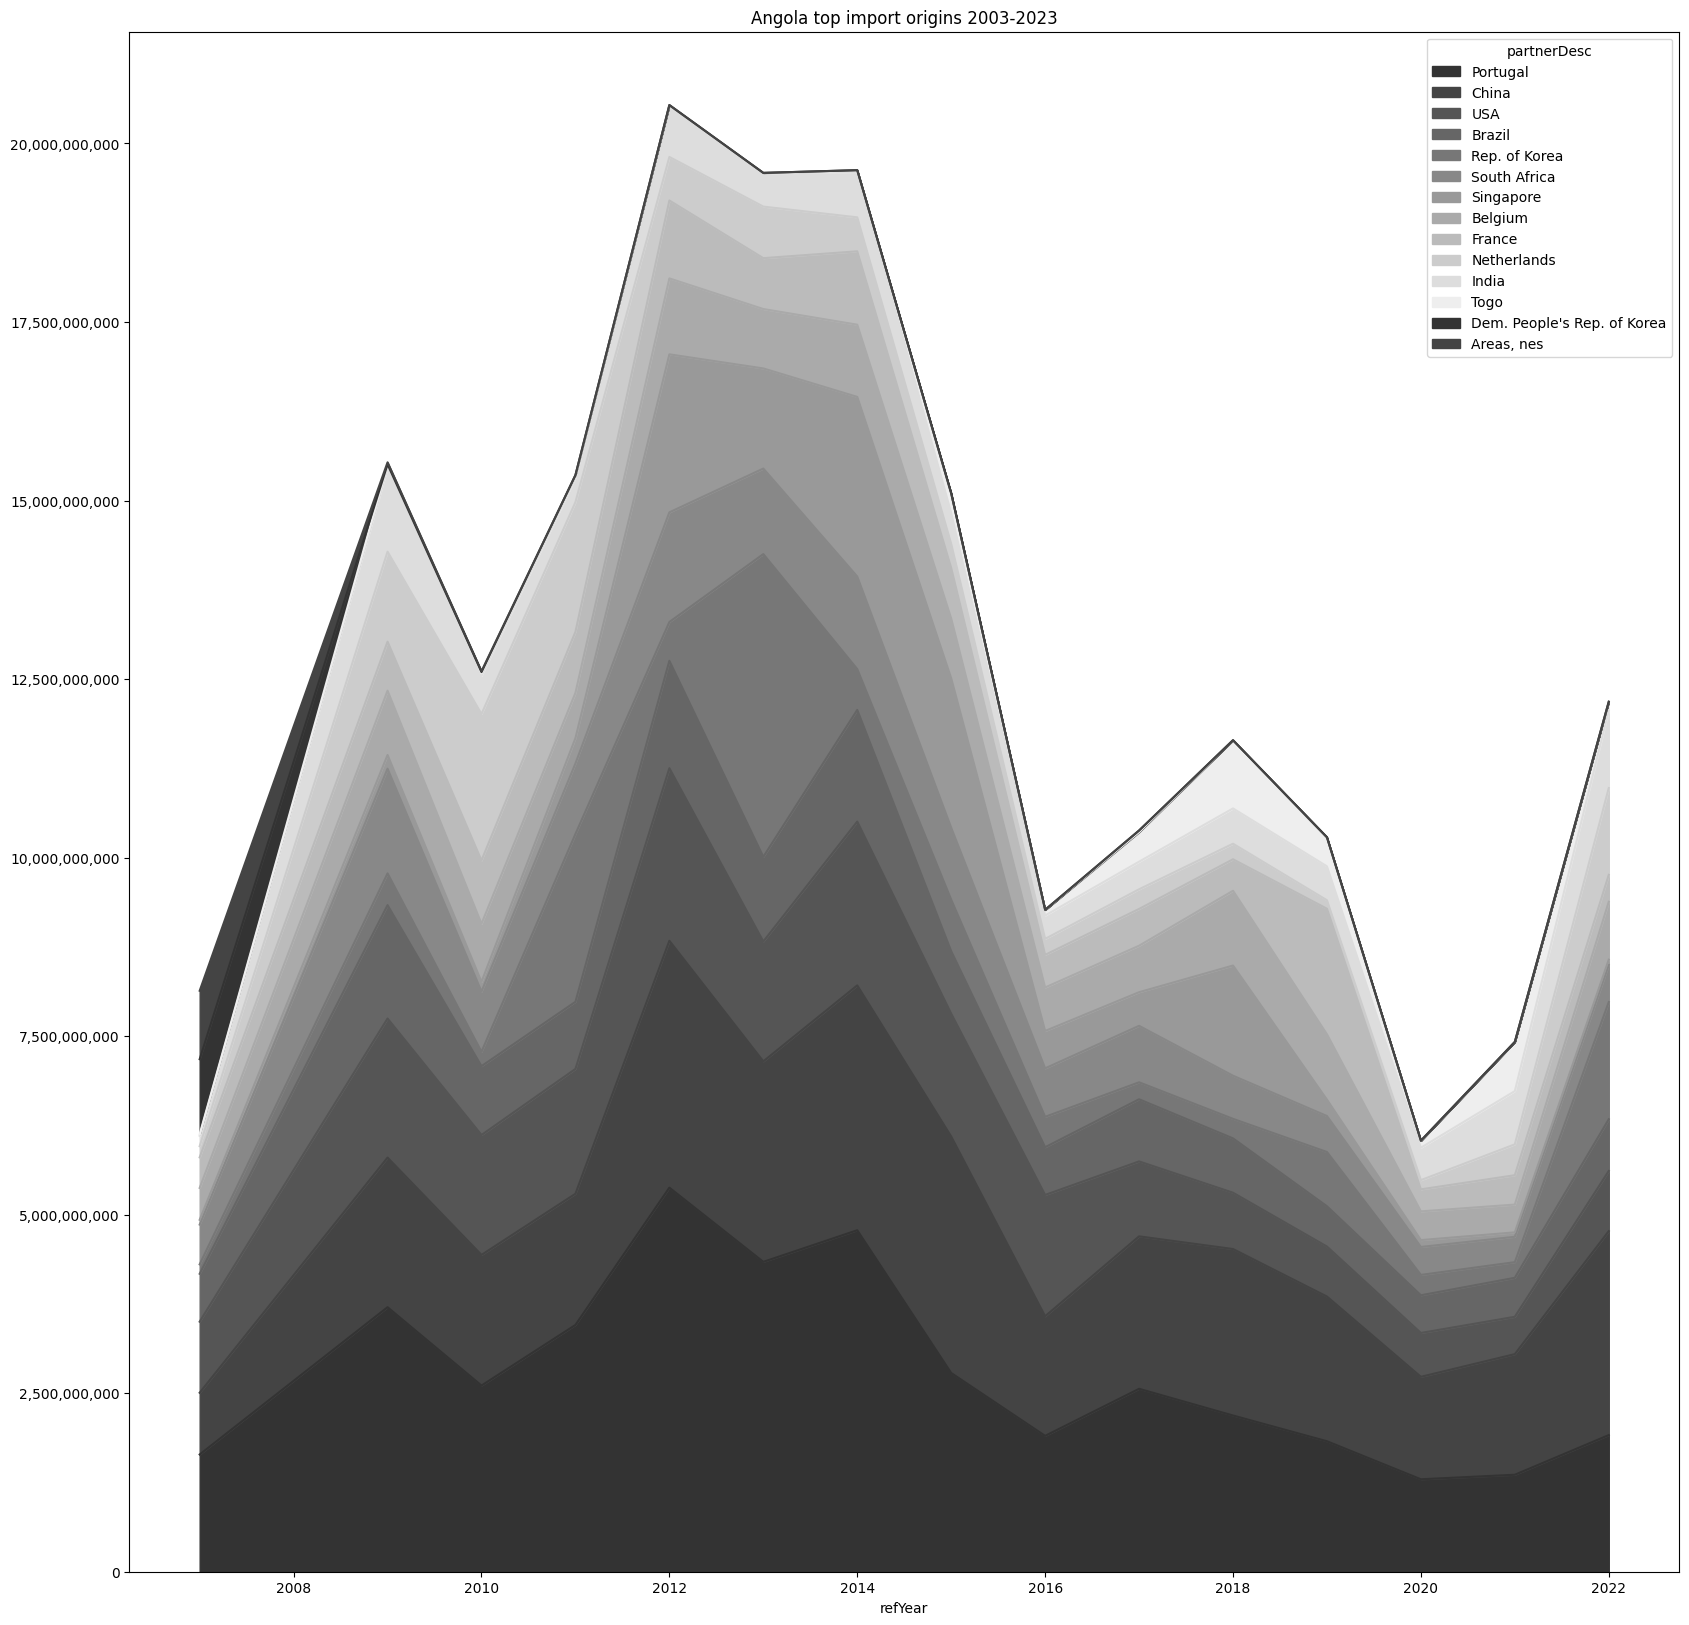

In [ ]:
import matplotlib.pyplot as plt

title=f"{country_of_interest_name} top import origins {start_year}-{end_year}"
plotfile = f"reports/{country_of_interest_name}_3.1.4_import_partners_{start_year}-{end_year}.png"

# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#333333','#444444', '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', '#DDDDDD', '#EEEEEE']
fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)

for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    # print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

In [ ]:
plotfile

'reports/Angola_3.1.4_import_partners_2003-2023.png'

In [ ]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
list(show_only_columns)

[('partner_perc', 'Areas, nes'),
 ('partner_perc', 'Belgium'),
 ('partner_perc', 'Brazil'),
 ('partner_perc', 'China'),
 ('partner_perc', "Dem. People's Rep. of Korea"),
 ('partner_perc', 'France'),
 ('partner_perc', 'India'),
 ('partner_perc', 'Netherlands'),
 ('partner_perc', 'Portugal'),
 ('partner_perc', 'Rep. of Korea'),
 ('partner_perc', 'Singapore'),
 ('partner_perc', 'South Africa'),
 ('partner_perc', 'Togo'),
 ('partner_perc', 'USA'),
 ('primaryValue', 'Areas, nes'),
 ('primaryValue', 'Belgium'),
 ('primaryValue', 'Brazil'),
 ('primaryValue', 'China'),
 ('primaryValue', "Dem. People's Rep. of Korea"),
 ('primaryValue', 'France'),
 ('primaryValue', 'India'),
 ('primaryValue', 'Netherlands'),
 ('primaryValue', 'Portugal'),
 ('primaryValue', 'Rep. of Korea'),
 ('primaryValue', 'Singapore'),
 ('primaryValue', 'South Africa'),
 ('primaryValue', 'Togo'),
 ('primaryValue', 'USA')]

#### Export to Excel

Table with the top import origins for the period of interest

In [ ]:
top_partners_file = f'reports/{country_of_interest_name}_3.1.1_top_import_partners.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_3.1.2_top_import_partners_cols.xlsx'
import_top_partners_file = f'reports/{country_of_interest_name}_3.1.3_import_top_{show_only_top}_partners_{start_year}-{end_year}.xlsx'

imports[cols].sort_values(['refYear','flowCode','partner_rank']).to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].reset_index().to_excel(import_top_partners_file)

print(f"Top import partners file: {top_partners_file}")
print(f"Top import partners cols file: {top_partners_cols_file}")
print(f"Import top partners file: {import_top_partners_file}")

Top import partners file: reports/Angola_3.1.1_top_import_partners.xlsx
Top import partners cols file: reports/Angola_3.1.2_top_import_partners_cols.xlsx
Import top partners file: reports/Angola_3.1.3_import_top_5_partners_2003-2023.xlsx


### 3.2 Imports: products

#### Main imported products

In [ ]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5
# years_of_interest = comtrade.year_range(2020, 2021)

print(country_of_interest_name, years_of_interest)


Angola 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products imported by country of interest

In [ ]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

In [ ]:
import comtradetools

clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'reporterCode': 24, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2003', 'partnerCode': None, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode': 'AG6', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}False
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'reporterCode': 24, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2004', 'partnerCode': None, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode': 'AG6', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}False
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'reporterCode': 24, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2005', 'partnerCode': None, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode

In [137]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [ ]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20070101,2007,52,2007,24,AGO,Angola,M,...,8.00,False,NaN,False,217.00,NaN,217.00,0,True,False
1,C,A,20070101,2007,52,2007,24,AGO,Angola,M,...,20.00,False,NaN,False,123.00,NaN,123.00,2,True,False
2,C,A,20070101,2007,52,2007,24,AGO,Angola,M,...,85.00,False,NaN,False,185.00,NaN,185.00,0,True,False
3,C,A,20070101,2007,52,2007,24,AGO,Angola,M,...,206.00,False,NaN,False,725.00,NaN,725.00,0,True,False
4,C,A,20070101,2007,52,2007,24,AGO,Angola,M,...,"2,790.00",False,NaN,False,"10,110.00",NaN,"10,110.00",0,True,False


Agreggate by product, keep the top products imported each year

In [ ]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
imports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
imports = imports[imports['product_rank']<=show_only_top]
imports.info()

cols=['refYear','flowCode','product_rank','cmdCode', 'cmdDesc','product_sum','product_upper_perc','classificationCode','aggrLevel','isLeaf', 'product_upper_sum']
formats =  comtradetools.make_format(cols)

top_import_products_codes = imports['cmdCode'].unique()

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
imports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 126 to 835585
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  75 non-null     object 
 1   freqCode                  75 non-null     object 
 2   refPeriodId               75 non-null     int64  
 3   refYear                   75 non-null     int64  
 4   refMonth                  75 non-null     int64  
 5   period                    75 non-null     object 
 6   reporterCode              75 non-null     int64  
 7   reporterISO               75 non-null     object 
 8   reporterDesc              75 non-null     object 
 9   flowCode                  75 non-null     object 
 10  flowDesc                  75 non-null     object 
 11  partnerCode               75 non-null     int64  
 12  partnerISO                75 non-null     object 
 13  partnerDesc               75 non-null     object 
 14  partne

,refYear,flowCode,product_rank,cmdCode,cmdDesc,product_sum,product_upper_perc,classificationCode,aggrLevel,isLeaf,product_upper_sum
1775,2007,M,1,843149,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431","$2,163,180,713",9.749%,H2,6,True,"$22,189,687,148"
126,2007,M,2,843143,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,"$940,396,197",4.238%,H2,6,True,"$22,189,687,148"
1748,2007,M,3,870421,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), for transport of goods, (of a gvw not exceeding 5 tonnes), nes in item no 8704.1","$486,127,495",2.191%,H2,6,True,"$22,189,687,148"
1743,2007,M,4,870323,"Vehicles; spark-ignition internal combustion reciprocating piston engine, cylinder capacity exceeding 1500cc but not exceeding 3000cc","$325,962,035",1.469%,H2,6,True,"$22,189,687,148"
3407,2007,M,5,110100,Wheat or meslin flour,"$247,315,599",1.115%,H2,6,True,"$22,189,687,148"
60131,2009,M,1,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations","$4,477,308,087",9.359%,H3,6,True,"$47,837,708,994"
60130,2009,M,2,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight), of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations","$2,224,822,150",4.651%,H3,6,True,"$47,837,708,994"
63771,2009,M,3,890520,Floating or submersible drilling or production platforms,"$1,310,077,119",2.739%,H3,6,True,"$47,837,708,994"
63362,2009,M,4,870421,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), for transport of goods, (of a gvw not exceeding 5 tonnes), n.e.c. in item no 8704.1","$1,076,595,302",2.251%,H3,6,True,"$47,837,708,994"
62780,2009,M,5,843143,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,"$792,007,274",1.656%,H3,6,True,"$47,837,708,994"


### Caveat

For Angola results match https://trendeconomy.com/data/h2/Angola/TOTAL for AG2 and AG4 but not https://www.statista.com/statistics/1143152/value-of-imports-into-angola-by-category/  and close but not same as https://globaledge.msu.edu/countries/angola/tradestats

The imports match World Bank Wits data mostly, but in some years 
there seems to be a mismatch of HS Codes, with different descriptions in Wits
and values that sometimes match AG4 and not AG6 (2015,total is AG4:2710 not AG6:271012 )
and in same cases match the first 5 digits (2015: 73042 "Casings tubing...", 2021 10011, Durum Wheat)

Use the following cell to compute totals for codes with first 5 digit in common to compare with other sources

In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth', 200)
pd.options.display.float_format = '{:,.2f}'.format

code_prefix = '10011'
cols=['refYear','flowCode','cmdCode','cmdDesc', 'classificationCode','aggrLevel','primaryValue','product_rank','product_perc']

# select rows and columns
selected_rows = df[(df['refYear']==2021) & (df['cmdCode'].str.startswith(code_prefix))][cols].sort_values(by=['primaryValue'],ascending=False).head(50)

# add total of primaryValue column
total = selected_rows['primaryValue'].sum()
selected_rows.loc['Total'] = pd.Series({'primaryValue': total})

# display selected rows
selected_rows


,refYear,flowCode,cmdCode,cmdDesc,classificationCode,aggrLevel,primaryValue,product_rank,product_perc
775232,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"227,412,579.20",2.00,0.01
775234,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"111,891,038.52",2.00,0.00
775239,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"57,244,189.03",2.00,0.00
775233,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"28,665,369.69",2.00,0.00
775235,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"12,131,357.73",2.00,0.00
775241,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"7,707,737.18",2.00,0.00
775236,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"4,055,544.08",2.00,0.00
775237,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"3,836,516.45",2.00,0.00
775226,"2,021.00",M,100111,"Cereals; wheat and meslin, durum wheat, seed",H5,6.00,"2,305,159.68",632.00,0.00
775229,"2,021.00",M,100111,"Cereals; wheat and meslin, durum wheat, seed",H5,6.00,"1,984,050.50",632.00,0.00


In [ ]:
print("Years available in the data:", list(imports.refYear.unique()))

Years available in the data: [2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


#### Export to Excel

In [ ]:
filename = f'reports/{country_of_interest_name}_3.2_imports_products_{clCode}-{cmdDetail}-{imports["refYear"].min()}-{imports["refYear"].max()}.xlsx'
print("Exporting to ",filename)
imports[cols].sort_values(['refYear','flowCode','product_rank']).to_excel(filename,index=False)

Exporting to  reports/Angola_3.2_imports_products_HS-AG6-2007-2022.xlsx


### 3.3 Import partners / product analysis

Which are the partners selling the top imports by country of interest

In [ ]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

In [ ]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1, # lots of data, better segment
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'reporterCode': 24, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2003', 'partnerCode': None, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode': 'AG6', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}False
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'reporterCode': 24, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2004', 'partnerCode': None, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode': 'AG6', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}False
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'reporterCode': 24, 'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'M', 'period': '2005', 'partnerCode': None, 'partner2Code': 0, 'clCode': 'HS', 'cmdCode

In [ ]:
cols2=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols2].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
759973,2020,M,Angola,China,"218,901.84",848420,Seals; mechanical
761169,2020,M,Angola,Switzerland,912.25,850780,"Electric accumulators; other than lead-acid, nickel-cadmium, nickel-iron, nickel-metal hydride and lithium-ion, including separators, whether or not rectangular (including square)"
175695,2010,M,Angola,Brazil,"51,785.00",392610,Plastics; office or school supplies
134824,2010,M,Angola,Rep. of Korea,"66,990.00",270220,"Lignite; agglomerated, excluding jet"
776540,2021,M,Angola,World,"3,079.98",180310,"Cocoa; paste, not defatted"
618314,2018,M,Angola,Spain,"7,481.15",851672,"Electro-thermic appliances; toasters, of a kind used for domestic purposes"
707655,2019,M,Angola,"China, Hong Kong SAR","18,863.17",851679,"Electro-thermic appliances; n.e.c. in heading no. 8516, used for domestic purposes"
699761,2019,M,Angola,Israel,"5,198.34",842482,"Mechanical appliances; agricultural or horticultural, n.e.c. in heading 8424"
426382,2014,M,Angola,South Africa,"86,708.00",842310,Weighing machines; personal (including baby scales) and household scales
637919,2018,M,Angola,South Africa,922.55,610333,"Jackets and blazers; men's or boys', of synthetic fibres, knitted or crocheted"


In [ ]:
df.refYear.unique()

array([2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022])

Aggregate by partner and keep the main ones

In [ ]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5   # change to have more top partners

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)
cols=['refYear','flowCode','cmdDesc','cmdCode',f'{partner_column}Desc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)

products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_import_products_codes)
                        & (products_and_partners[f'{prefix}_rank']<=show_only_top))]
print(f"Data available for years {products_and_partners.refYear.unique()}")


Top products imported by Angola in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['843143' '870323' '870421' '843149' '110100' '271011' '271019' '890520'
 '848180' '020714' '890120' '890590' '271012' '870322' '999999' '848140'
 '841182' '100630' '490700' '100119' '151190' '870210']
   843143: Boring or sinking machinery; parts for boring or sinking machinery of subheading 8430.41 or 8430.49
   870323: Vehicles; with only spark-ignition internal combustion reciprocating piston engine, cylinder capacity over 1500 but not over 3000cc
   870421: Vehicles; with only compression-ignition internal combustion piston engine (diesel or semi-diesel), for transport of goods, (of a gvw not exceeding 5 tonnes), n.e.c. in item no 8704.1
   843149: Machinery; parts of machines handling earth, minerals or ores and n.e.c. in heading no. 8431
   110100: Wheat or meslin flour
   271011: 271011
   271019: Petroleum oils and oils from bituminous m

/var/folders/bc/41rz3hqn5335_y1tbvy1w2_w0000gp/T/ipykernel_39487/890561552.py:19: UserWarning: Removing world from data
  warnings.warn("Removing world from data")


Data available for years [2007 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022]


### Partners for main import products

In [ ]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True])\
                                            .head(30).style.format(formats) #.hide(axis='index')

,refYear,flowCode,cmdDesc,cmdCode,partnerDesc,cmd_partner_rank,cmd_partner_sum,cmd_partner_perc,cmd_partner_upper_sum
54357,2007,M,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431",843149,Dem. People's Rep. of Korea,1,"$1,039,649,019",96.122%,"$1,081,590,356"
24201,2007,M,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431",843149,United Arab Emirates,2,"$9,563,877",0.884%,"$1,081,590,356"
33374,2007,M,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431",843149,South Africa,3,"$5,292,918",0.489%,"$1,081,590,356"
31536,2007,M,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431",843149,Portugal,4,"$5,250,428",0.485%,"$1,081,590,356"
6463,2007,M,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431",843149,"Areas, nes",5,"$4,743,899",0.439%,"$1,081,590,356"
26484,2007,M,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,USA,1,"$161,572,074",34.363%,"$470,198,099"
6462,2007,M,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,"Areas, nes",2,"$96,329,985",20.487%,"$470,198,099"
46429,2007,M,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,United Kingdom,3,"$75,352,980",16.026%,"$470,198,099"
13664,2007,M,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,Belgium,4,"$24,810,812",5.277%,"$470,198,099"
27411,2007,M,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,Denmark,5,"$20,692,632",4.401%,"$470,198,099"


In [ ]:
filename = f'reports/{country_of_interest_name}_3.3_imports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'
print("Exporting to ",filename)
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True]).to_excel(filename, index=False)

Exporting to  reports/Angola_3.3_imports_products_partners_HS-AG6-2007-2022.xlsx


### 3.4 Main partners and main products imported by country of interest

Detail of the main products by import partner.

Allows to analyse the mix of products of the main suppliers from this country.



In [ ]:
top_import_partners

array(['China', "Dem. People's Rep. of Korea", 'Portugal', 'USA',
       'Areas, nes', 'Brazil', 'South Africa', 'Netherlands',
       'Rep. of Korea', 'Singapore', 'Belgium', 'Togo', 'France', 'India'],
      dtype=object)

In [ ]:
import comtradetools

show_only_top = 5  # for suppliers with wide range of products e.g PT->AO increase

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='partner_cmd'
suppliers_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear','flowCode',f'{partner_column}Desc',f'{prefix}_rank','cmdCode','cmdDesc',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
suppliers_and_products=suppliers_and_products[(suppliers_and_products[f'{partner_column}Desc'].isin(top_import_partners)
                       & (suppliers_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top import partners (14): ['China' "Dem. People's Rep. of Korea" 'Portugal' 'USA' 'Areas, nes'
 'Brazil' 'South Africa' 'Netherlands' 'Rep. of Korea' 'Singapore'
 'Belgium' 'Togo' 'France' 'India']
First rows


refYear,flowCode,partnerDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2007,M,Portugal,1,220300,Beer; made from malt,"$75,084,327",4.574%,"$1,641,640,150"
2007,M,Portugal,2,220421,"Wine; still, in containers holding 2 litres or less","$41,264,247",2.514%,"$1,641,640,150"
2007,M,Portugal,3,160100,"Meat preparations; sausages and similar products, of meat, meat offal or blood, and food preparations based on these products","$39,855,691",2.428%,"$1,641,640,150"
2007,M,Portugal,4,730890,"Iron or steel; structures and parts thereof, n.e.s. in heading no. 7308","$30,750,844",1.873%,"$1,641,640,150"
2007,M,Portugal,5,854459,"Insulated electric conductors; for a voltage exceeding 80 volts but not exceeding 1000 volts, not fitted with connectors","$25,746,766",1.568%,"$1,641,640,150"
2007,M,Dem. People's Rep. of Korea,1,843149,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431","$1,039,649,019",98.908%,"$1,051,122,769"
2007,M,Dem. People's Rep. of Korea,2,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations","$7,774,287",0.740%,"$1,051,122,769"
2007,M,Dem. People's Rep. of Korea,3,390210,"Propylene, other olefin polymers; polypropylene in primary forms","$734,982",0.070%,"$1,051,122,769"
2007,M,Dem. People's Rep. of Korea,4,847989,"Machines and mechanical appliances; n.e.s. in item no. 8479.8, having individual functions","$636,208",0.061%,"$1,051,122,769"
2007,M,Dem. People's Rep. of Korea,5,731815,"Iron or steel; threaded screws and bolts n.e.s. in item no. 7318.1, whether or not with their nuts or washers","$563,435",0.054%,"$1,051,122,769"


Last rows

In [ ]:

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,flowCode,partnerDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2022,M,Singapore,3,730520,"Iron or steel (excluding cast iron); casing of a kind used in drilling for oil or gas (not seamless), having circular cross-sections, external diameter exceeds 406.4mm","$5,128,630",7.023%,"$73,021,366"
2022,M,Singapore,4,848180,"Taps, cocks, valves and similar appliances; for pipes, boiler shells, tanks, vats or the like, including thermostatically controlled valves","$3,719,977",5.094%,"$73,021,366"
2022,M,Singapore,5,890590,"Vessels; light, fire-floats, floating cranes and other vessels, the navigability of which is subsidiary to their main function, floating docks","$3,676,436",5.035%,"$73,021,366"
2022,M,Dem. People's Rep. of Korea,1,870323,"Vehicles; with only spark-ignition internal combustion reciprocating piston engine, cylinder capacity over 1500 but not over 3000cc","$682,614",19.335%,"$3,530,526"
2022,M,Dem. People's Rep. of Korea,2,390230,"Propylene, other olefin polymers; propylene copolymers in primary forms","$305,958",8.666%,"$3,530,526"
2022,M,Dem. People's Rep. of Korea,3,730890,"Iron or steel; structures and parts thereof, n.e.c. in heading 7308","$271,074",7.678%,"$3,530,526"
2022,M,Dem. People's Rep. of Korea,4,390110,"Ethylene polymers; in primary forms, polyethylene having a specific gravity of less than 0.94","$242,268",6.862%,"$3,530,526"
2022,M,Dem. People's Rep. of Korea,5,390210,"Propylene, other olefin polymers; polypropylene in primary forms","$230,126",6.518%,"$3,530,526"
2022,M,"Areas, nes",1,401693,"Rubber; vulcanised (other than hard rubber), gaskets, washers and other seals, of non-cellular rubber",$829,69.540%,"$1,192"
2022,M,"Areas, nes",2,870840,Vehicle parts; gear boxes and parts thereof,$363,30.460%,"$1,192"


#### Export to Excel

In [ ]:
filename = f'reports/{country_of_interest_name}_3.4_imports_partners_products_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).to_excel(filename, index=False)

print("Exporting to ",filename)

Exporting to  reports/Angola_3.4_imports_partners_products_HS-AG6-2007-2022.xlsx


### 3.5 Get the alternative clients for country of interest suppliers

For each year, supplier, imported commodity, fetch all the 
exports of the commodity by the supplier to other countries, and
compute the ranking of country of interest among the clients
of partner for that commodity.

Country of interest: Angola, in 2022 Argentina was #1 supplier of Angola for commodity
code 100119 "Cereals; wheat and meslin, durum wheat, other than seed"; fetch all the clients of Argentina for 100119 and compute the ranking of Angola.

First step is to get the combos os partner and commodity.



In [ ]:
top_import_products_codes

array(['843143', '870323', '870421', '843149', '110100', '271011',
       '271019', '890520', '848180', '020714', '890120', '890590',
       '271012', '870322', '999999', '848140', '841182', '100630',
       '490700', '100119', '151190', '870210'], dtype=object)

In [ ]:
combos_of_interest = suppliers_and_products[(suppliers_and_products['cmdCode'].isin(top_import_products_codes)
                & (suppliers_and_products[f'{partner_column}Code'].isin(top_import_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

96

In [ ]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get the all clients of suppliers for the products imported by country of interest

In [ ]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='X',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                retry_if_empty=False,
                                cache=True,

                                )

Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  768,899,408,710,842,76,620,528,56,410,251,156,699,702
cmdCodeCSV:  999999,271019,848180,100630,870421,271011,890120,870323,890520,843149,151190,870210,490700,890590,841182,271012,020714,110100,100119,843143,870322
INFO:root:Calling getFinalData for period 2003
DEBUG:root:Call ('b5cdc1c0678544b0ab5085f7292e6643',){'typeCode': 'C', 'freqCode': 'A', 'flowCode': 'X', 'reporterCode': '768,899,408,710,842,76,620,528,56,410,251,156,699,702', 'partnerCode': None, 'partner2Code': 0, 'period': '2003', 'clCode': 'HS', 'cmdCode': '999999,271019,848180,100630,870421,271011,890120,870323,890520,843149,151190,870210,490700,890590,841182,271012,020714,110100,100119,843143,870322', 'motCode': 0, 'customsCode': 'C00', 'includeDesc': True}False
DEBUG:root:Calling comtradeapicall.getFinalData with ('b5cdc1c0678544b0ab5085f7292e6643',) {'typeCode': 'C', 'freqCode': '

Countries also buying top imports of country of interest from the same suppliers

In [ ]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['Argentina',
  'China',
  'Germany',
  'Mexico',
  'Rep. of Korea',
  'Japan',
  'Russian Federation',
  'Nigeria',
  'India',
  'USA'],
 ['Brazil',
  'Uruguay',
  'Chile',
  'Colombia',
  'Australia',
  'Finland',
  'Morocco',
  'Portugal',
  'Spain',
  'Switzerland',
  'Syria',
  'Tunisia',
  'Bolivia (Plurinational State of)',
  'Canada',
  'Israel',
  'United Kingdom',
  'Algeria',
  'Cuba',
  'Ecuador',
  'Germany',
  'Kuwait',
  'Mexico',
  'Paraguay',
  'Peru',
  'Singapore',
  'Venezuela',
  'USA',
  'Dominican Rep.',
  'France',
  'Guatemala',
  'Honduras',
  'Netherlands',
  'Areas, nes',
  'Costa Rica',
  'Italy',
  'Panama',
  'China',
  'Saudi Arabia',
  'Belgium',
  'Nicaragua',
  'Albania',
  'Bahamas',
  'Djibouti',
  'Hungary',
  'China, Hong Kong SAR',
  'Jordan',
  'Lebanon',
  'Liberia',
  'Libya',
  'Lithuania',
  'Malaysia',
  'Mauritius',
  'Other Asia, nes',
  'Oman',
  'Netherlands Antilles (...2010)',
  'Norway',
  'Pakistan',
  'Philippines',
  'Qatar',
  '

### Ranking of country of interest in the costumers of main suppliers
Allows assessment of the importance of country of interest for the partners
that are selling its main imports.

It allows for restricting rank, avoiding irrelevant matchess

For each supplier show the top costumers of the products bought by country of interest. 

If country of interest is not in the top five constumers, show position anyway if it is a supplier in the given year 

In [ ]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_costumers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_costumers = other_costumers[other_costumers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','cmdCode','cmdDesc','refYear','partnerDesc','cmd_partner_rank','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Belgium,110100,Wheat or meslin flour,2003,Netherlands,1,"$72,432,597",36.107%,"$200,604,443"
Belgium,110100,Wheat or meslin flour,2003,Angola,2,"$30,955,930",15.431%,"$200,604,443"
Belgium,110100,Wheat or meslin flour,2003,France,3,"$26,141,710",13.031%,"$200,604,443"
Belgium,110100,Wheat or meslin flour,2003,Libya,4,"$22,250,612",11.092%,"$200,604,443"
Belgium,110100,Wheat or meslin flour,2003,Indonesia,5,"$13,053,775",6.507%,"$200,604,443"
Belgium,110100,Wheat or meslin flour,2004,Netherlands,1,"$82,677,898",36.808%,"$224,619,378"
Belgium,110100,Wheat or meslin flour,2004,Libya,2,"$37,678,327",16.774%,"$224,619,378"
Belgium,110100,Wheat or meslin flour,2004,Angola,3,"$35,706,367",15.896%,"$224,619,378"
Belgium,110100,Wheat or meslin flour,2004,France,4,"$32,612,168",14.519%,"$224,619,378"
Belgium,110100,Wheat or meslin flour,2004,Dem. Rep. of the Congo,5,"$5,313,547",2.366%,"$224,619,378"


In [ ]:
ignore_if_rank_is_higher = 25

relevant_for_partner_exports=other_costumers[
    (other_costumers['partnerCode'] == country_of_interest) &
    (other_costumers['cmd_partner_rank'] < ignore_if_rank_is_higher)
][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_exports.head(10).style.format(formats).hide(axis='index')

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Belgium,110100,Wheat or meslin flour,2003,Angola,2,"$30,955,930",15.431%,"$200,604,443"
Belgium,110100,Wheat or meslin flour,2004,Angola,3,"$35,706,367",15.896%,"$224,619,378"
Belgium,110100,Wheat or meslin flour,2005,Angola,2,"$30,428,565",15.478%,"$196,586,107"
Belgium,110100,Wheat or meslin flour,2006,Angola,2,"$38,034,292",20.108%,"$189,153,344"
Belgium,110100,Wheat or meslin flour,2007,Angola,2,"$56,202,823",19.971%,"$281,418,401"
Belgium,110100,Wheat or meslin flour,2008,Angola,2,"$62,116,248",16.013%,"$387,908,681"
Belgium,110100,Wheat or meslin flour,2009,Angola,2,"$27,871,454",11.216%,"$248,487,897"
Belgium,110100,Wheat or meslin flour,2010,Angola,2,"$41,695,532",18.301%,"$227,830,844"
Belgium,110100,Wheat or meslin flour,2011,Angola,3,"$19,005,160",7.594%,"$250,280,009"
Belgium,110100,Wheat or meslin flour,2012,Angola,2,"$33,056,094",13.779%,"$239,896,771"


#### Export to Excel


In [ ]:
filename = filename = f'reports/{country_of_interest_name}_3.5.1_import_partners_alternative.xlsx'

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Angola_3.5.1_import_partners_alternative.xlsx


In [ ]:
filename = f'reports/{country_of_interest_name}_3.5.2_import_partners_alternative_relevant.xlsx'

relevant_for_partner_exports.to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Angola_3.5.2_import_partners_alternative_relevant.xlsx


In [91]:
from datetime import datetime

current_datetime = datetime.now()
print(f"Note run for {country_of_interest_name}:", current_datetime)

Note run for Angola: 2024-06-17 14:58:05.828922
